In [1]:
# This file uses BeamNGpy which is an official library providing a Python interface to BeamNG.research © Copyright 2018, BeamNG GmbH.
# https://github.com/BeamNG/BeamNGpy

# Define all the imports

import time
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely import geometry
import sys
from matplotlib.pyplot import imshow
from time import sleep
import os
import math
import csv

from beamngpy import BeamNGpy, Vehicle, Scenario, Road, setup_logging
from beamngpy.sensors import Electrics
from beamngpy.sensors import Camera



In [2]:
# Calling BeamngPY
bng = BeamNGpy('localhost', 63124, home='C:/Beamng/trunk')

# Create a scenario in asfault map with scenario name 'indicatorsT1'.
scenario = Scenario('asfault', 'indicatorsT1')

In [3]:
# Properties for list of vehicles. 

original_vehicle1 = (1048.5682373046875, -319.7727966308594, 0.20004777610301971)
vehicle1 = Vehicle('ego_vehicle', model='etk800', licence='Main01')

original_vehicle2 = (862.418, -293.463, 0.2012)    #(862.418, -293.463, 0.2012)
vehicle2 = Vehicle('green_vehicle', model='van', licence='Main02', colour='Green')

original_vehicle3 = (544.9312744140625, 11.4306058883667, 0.20160448551177979)
vehicle3 = Vehicle('blue_vehicle', model ='hatch', licence = 'Main03', colour ='Blue')

original_vehicle4 = (147.74327087402344, 3.6260170936584473, 0.20102712512016296)
vehicle4 = Vehicle('red_vehicle', model ='coupe', licence = 'Main04', colour ='Yellow')

original_vehicle5 = (-203.6647186279297, 409.2173156738281, 0.20087432861328125)
vehicle5 = Vehicle('blue1_vehicle', model ='hatch', licence = 'Main05', colour ='Black')

original_vehicle6 = (-818.1721801757812, 292.10882568359375, 0.20000994205474854)
vehicle6 = Vehicle('white1_vehicle', model ='hatch', licence = 'Main06', colour ='White')

# Add vehicles to our scenario at this position and rotation.

scenario.add_vehicle(vehicle1, pos=original_vehicle1, rot=(0, 0, 90))

scenario.add_vehicle(vehicle2, pos=original_vehicle2, rot=(0, 0, 100))

scenario.add_vehicle(vehicle3, pos=original_vehicle3, rot=(0, 0, 90))

scenario.add_vehicle(vehicle4, pos=original_vehicle4, rot=(0, 0, 100))

scenario.add_vehicle(vehicle5, pos=original_vehicle5, rot=(0, 0, 125))

scenario.add_vehicle(vehicle6, pos=original_vehicle6, rot=(0, 0, 90))

In [4]:
# Creation main road for the scenario.

road = Road('road_rubber_sticky', rid='main_road', texture_length=16)
road.nodes = [
    (1050.0,-323.18966165522687,0.01,7.999999999999996),
    (954.4249840125182,-293.7717025317153,0.01,8.000000000000062),
    (945.3077798322204,-291.3954300619591,0.01,8.000000000000012),
    (936.0181635743155,-289.8228167284825,0.01,8.000000000000018),
    (926.6268348277497,-289.0658310683232,0.01,8.0),
    (917.2052672749237,-289.13023419943534,0.01,8.000000000000032),
    (907.8251647338126,-290.01553597510355,0.01,8.00000000000001),
    (898.557915448615,-291.71499871425516,0.01,7.999999999999959),
    (884.1421943383076,-294.35860741960215,0.01,7.999999999999995),
    (869.5509237188014,-295.7357435150861,0.01,7.9999999999999805),
    (854.895151969961,-295.8359261634828,0.01,8.000000000000004),
    (840.286418364192,-294.658392914346,0.01,8.000000000000004),
    (825.8359041852287,-292.2121055067158,0.01,8.000000000000012),
    (811.6535865714322,-288.51568166487283,0.01,7.999999999999975),
    (797.8474015233609,-283.5972534062153,0.01,8.000000000000039),
    (784.5224224456331,-277.4942529396198,0.01,8.000000000000027),
    (771.7800604748727,-270.25312778372955,0.01,8.000000000000021),
    (759.7172926797257,-261.9289872732918,0.01,7.9999999999999725),
    (748.4259240068113,-252.5851831438444,0.01,8.000000000000004),
    (737.9918885896456,-242.29282738675565,0.01,8.00000000000003),
    (728.4945957379957,-231.13025104403135,0.01,7.999999999999948),
    (720.006325585085,-219.1824080617875,0.01,8.000000000000036),
    (712.5916789921349,-206.54022873942375,0.01,7.999999999999959),
    (706.3070858968036,-193.29992769513996,0.01,8.0),
    (701.2003758472878,-179.56227161459543,0.01,7.999999999999917),
    (697.31041399058,-165.43181235558666,0.01,8.000000000000064),
    (694.666805285233,-151.01609124527928,0.01,8.000000000000004),
    (693.289669189749,-136.42482062577312,0.01,8.000000000000032),
    (693.1894865413524,-121.76904887693271,0.01,7.999999999999888),
    (693.1131569044787,-110.60274659210194,0.01,8.000000000000032),
    (692.0639103555386,-99.48558802485915,0.01,8.000000000000005),
    (690.0497322943219,-88.50218146462495,0.01,8.000000000000068),
    (687.0859518320683,-77.73611726728494,0.01,8.000000000000012),
    (683.1951251276753,-67.26933168210815,0.01,7.999999999999983),
    (678.4068637217085,-57.18148326741573,0.01,8.000000000000059),
    (672.7576091746989,-47.54934664085289,0.01,7.9999999999999325),
    (666.2903557248623,-38.44622817819089,0.01,8.000000000000037),
    (659.0543230759862,-29.941408107543808,0.01,8.00000000000003),
    (651.1045818057646,-22.099613245000015,0.01,8.000000000000004),
    (642.5016342454489,-14.980524384468652,0.01,7.9999999999999964),
    (633.310954020575,-8.638322090801779,0.01,7.999999999999986),
    (623.6024877571385,-3.121274352980649,0.01,8.000000000000028),
    (613.4501227455364,1.5286307644254435,0.01,7.999999999999988),
    (602.9311246136725,5.276004675783568,0.01,8.000000000000021),
    (592.1255492888752,8.092327602902003,0.01,8.000000000000027),
    (581.1156337239507,9.956165627763141,0.01,8.000000000000018),
    (569.9851700243172,10.853333817581643,0.01,8.000000000000032),
    (558.8188677394864,10.777004180707962,0.01,8.000000000000032),
    (547.7017091722437,9.727757631767815,0.01,8.000000000000037),
    (536.7183026120094,7.713579570551076,0.01,8.000000000000043),
    (525.9522384146694,4.749799108297523,0.01,8.000000000000043),
    (515.4854528294927,0.8589724039044881,0.01,7.999999999999984),
    (505.39760441480024,-3.9292890020621627,0.01,7.999999999999995),
    (493.73352968531213,-9.465716252711154,0.01,7.999999999999996),
    (481.6313088524515,-13.96448462966561,0.01,8.000000000000016),
    (469.1830471242771,-17.391355789146296,0.01,8.000000000000004),
    (456.4834832890063,-19.72024917242819,0.01,7.9999999999999964),
    (443.6292686956319,-20.933440494640223,0.01,8.0),
    (430.7182316787963,-21.021696637275436,0.01,7.999999999999998),
    (417.848633026095,-19.98434591779785,0.01,7.999999999999994),
    (405.1184181541512,-17.82928320155218,0.01,7.999999999999988),
    (392.62447168485426,-14.57290981707149,0.01,7.999999999999979),
    (380.4618800948866,-10.240008732063714,0.01,7.999999999999979),
    (368.72320805022173,-4.8635559400629305,0.01,7.9999999999999885),
    (357.4977939331232,1.51553050679275,0.01,8.000000000000005),
    (355.3740669379965,2.7223846994411254,0.01,7.999999999999992),
    (353.1532370917085,3.7395514438737076,0.01,8.000000000000009),
    (350.8522062503633,4.5592894869832925,0.01,8.000000000000012),
    (348.4884866480639,5.175360127290453,0.01,7.999999999999999),
    (346.0800676182367,5.583074695228829,0.01,8.000000000000004),
    (343.6452786839418,5.779330236751619,0.01,8.000000000000004),
    (341.20265005913507,5.762633128685504,0.01,8.000000000000004),
    (338.77077162255074,5.53311044610485,0.01,8.0),
    (336.3681514374995,5.092508995213684,0.01,8.000000000000004),
    (334.01307489433134,4.44418201909572,0.01,8.000000000000014),
    (331.72346554757394,3.593063677509747,0.01,7.9999999999999964),
    (329.51674870685997,2.5456314949545362,0.01,8.0),
    (327.40971881979937,1.3098570627961763,0.01,8.0),
    (325.418411656092,-0.10485462935560186,0.01,8.000000000000025),
    (323.557982265638,-1.6877367712972475,0.01,8.000000000000018),
    (316.3820403310295,-7.793139318786457,0.01,7.999999999999988),
    (308.7012841281584,-13.249884417086172,0.01,7.999999999999995),
    (300.57416884949606,-18.01644294112556,0.01,7.999999999999996),
    (292.06254674959933,-22.056538502409957,0.01,7.999999999999995),
    (283.23119641210644,-25.339423534241583,0.01,8.000000000000009),
    (274.1473297456008,-27.840113299268026,0.01,8.0),
    (264.88008046040324,-29.539576038419668,0.01,8.0),
    (255.49997791929212,-30.42487781408791,0.01,7.9999999999999964),
    (246.07841036646613,-30.489280945200086,0.01,8.000000000000002),
    (236.68708161990034,-29.732295285040763,0.01,8.0),
    (227.3974653619954,-28.159681951564185,0.01,8.0),
    (218.28026118169763,-25.783409481808008,0.01,8.000000000000007),
    (209.4048565079375,-22.62156274409962,0.01,8.00000000000001),
    (200.83879852939822,-18.698205301288237,0.01,8.00000000000002),
    (192.64728011962362,-14.043196272501657,0.01,8.000000000000004),
    (184.45576170984907,-9.388187243715066,0.01,8.000000000000004),
    (175.88970373130977,-5.464829800903676,0.01,8.000000000000009),
    (167.01429905754964,-2.302983063195276,0.01,8.000000000000004),
    (157.89709487725187,0.07328940656091376,0.01,7.999999999999998),
    (148.60747861934695,1.645902740037501,0.01,8.0),
    (139.21614987278113,2.40288840019684,0.01,8.0),
    (135.04222598541855,2.739326471378762,0.01,8.0),
    (130.9135076485719,3.438265730701684,0.01,7.999999999999999),
    (126.8614169017729,4.494386828371097,0.01,8.000000000000004),
    (122.91679260232395,5.899652045130379,0.01,8.0),
    (119.10965572297314,7.643366464157658,0.01,8.0),
    (115.46898087418445,9.712259365840584,0.01,8.000000000000002),
    (112.02247578985673,12.090585225965654,0.01,7.999999999999999),
    (108.79637045473835,14.760243548664906,0.01,7.999999999999998),
    (105.81521747840526,17.700916622118825,0.01,8.000000000000004),
    (103.10170523507672,20.890224148611487,0.01,8.000000000000012),
    (100.67648519138797,24.30389357210973,0.01,8.000000000000007),
    (98.55801473625934,27.915944807070794,0.01,8.000000000000002),
    (96.76241670902184,31.69888796258045,0.01,8.00000000000001),
    (95.30335669487445,35.62393255702173,0.01,8.000000000000021),
    (94.19193902152935,39.66120663102424,0.01,8.00000000000001),
    (92.15433995373003,47.0628757666955,0.01,8.000000000000005),
    (89.47939659445981,54.25879085650453,0.01,7.999999999999995),
    (86.18746687785772,61.194186641605576,0.01,8.000000000000004),
    (82.30360437678858,67.81628057236753,0.01,8.000000000000007),
    (77.85736763002585,74.07467451544764,0.01,8.000000000000014),
    (72.88259518392353,79.9217383140175,0.01,8.00000000000002),
    (67.4171480606462,85.31297228201636,0.01,8.000000000000004),
    (61.50262161292919,90.20734587363165,0.01,8.000000000000007),
    (55.18402895832835,94.56760995052763,0.01,8.000000000000014),
    (48.50945840221574,98.36058027027966,0.01,8.000000000000014),  
    (41.52970745673928,101.55739003849634,0.01,8.000000000000005),
    (34.29789624108288,104.13370960255503,0.01,8.00000000000001),
    (26.869063205284704,106.06993161494896,0.01,8.000000000000004),
    (19.299746254399196,107.35132025704098,0.01,8.00000000000001),
    (11.647552460901125,107.96812338754117,0.01,8.000000000000016),
    (3.970719640079963,107.9156467621905,0.01,8.000000000000032),
    (-3.672326874899454,107.19428975979417,0.01,8.0),
    (-11.223418885060454,105.80954234270764,0.01,7.999999999999977),
    (-18.62508802073171,103.77194327490832,0.01,7.9999999999999805),
    (-25.821003110540744,101.09699991563812,0.01,7.99999999999997),
    (-32.75639889564178,97.80507019903602,0.01,7.999999999999972),
    (-39.37849282640374,93.92120769796688,0.01,7.999999999999945),
    (-45.63688676948385,89.47497095120414,0.01,7.999999999999957),
    (-51.4839505680537,84.50019850510184,0.01,8.000000000000009),
    (-54.673258094546355,81.7866862617733,0.01,7.999999999999999),
    (-58.086927518044604,79.36146621808453,0.01,8.0),
    (-61.69897875300566,77.24299576295591,0.01,7.999999999999988),
    (-65.48192190851532,75.4473977357184,0.01,8.000000000000007),
    (-69.4069665029566,73.98833772157101,0.01,7.999999999999989),
    (-73.44424057695912,72.87692004822593,0.01,7.999999999999987),
    (-77.56301803704693,72.12160327526963,0.01,7.999999999999991),
    (-81.73195249976298,71.72813581941709,0.01,8.000000000000004),
    (-85.91931585657451,71.69951220558946,0.01,8.000000000000002),
    (-90.0932397439371,72.03595027677137,0.01,8.000000000000009),
    (-94.22195808078374,72.7348895360943,0.01,8.000000000000004),
    (-98.27404882758276,73.7910106337637,0.01,7.999999999999992),
    (-103.86226658513543,75.78180302417269,0.01,7.999999999999989),
    (-109.25571049754906,78.25206511779467,0.01,8.000000000000002),
    (-114.41333319999971,81.18299672851215,0.01,8.000000000000002),
    (-119.295882069464,84.55229169702268,0.01,8.00000000000001),
    (-123.86619796088169,88.33430765417995,0.01,8.000000000000004),
    (-128.0894980106869,92.50026117490634,0.01,7.999999999999988),
    (-131.9336403554023,97.01844683743762,0.01,8.000000000000014),
    (-135.36936875062807,101.8544785207268,0.01,7.9999999999999964),
    (-138.37053522872694,106.97155110358831,0.01,8.000000000000016),
    (-140.91429910064673,112.33072057389366,0.01,8.000000000000014),
    (-142.98130078735554,117.89120041601882,0.01,8.000000000000016),
    (-144.55580915792774,123.6106720208557,0.01,8.000000000000014),
    (-147.51413318533986,139.74255040619965,0.01,8.000000000000007),
    (-149.05521405409567,156.0708770518375,0.01,7.999999999999975),
    (-149.1673232082539,172.47138353268272,0.01,8.000000000000002),
    (-147.84960742945802,188.8192520915195,0.01,8.000000000000014),
    (-145.11209533044325,204.99006557750218,0.01,8.000000000000028),
    (-140.97562103123803,220.86075433579828,0.01,7.999999999999992),
    (-137.2791971893951,235.0430719495948,0.01,8.000000000000002),
    (-134.83290978176484,249.49358612855806,0.01,7.999999999999979),
    (-133.6553765326281,264.1023197343271,0.01,8.000000000000002),
    (-133.75555918102484,278.7580914831675,0.01,7.999999999999975),
    (-135.13269527650877,293.34936210267364,0.01,8.000000000000004),
    (-137.77630398185576,307.76508321298104,0.01,8.000000000000014),
    (-141.66626583856356,321.89554247198976,0.01,8.000000000000016),
    (-146.77297588807943,335.6331985525343,0.01,8.000000000000037),
    (-153.0575689834107,348.8734995968181,0.01,8.000000000000036),
    (-160.47221557636087,361.5156789191818,0.01,8.00000000000002),
    (-168.96048572927154,373.4635219014257,0.01,8.000000000000032),
    (-178.4577785809214,384.62609824415,0.01,8.000000000000007),
    (-188.89181399808723,394.91845400123873,0.01,7.99999999999994),
    (-200.1831826710015,404.26225813068606,0.01,7.999999999999979),
    (-212.24595046614854,412.5863986411239,0.01,7.999999999999957),
    (-224.988312436909,419.82752379701407,0.01,7.9999999999999885),
    (-238.3132915146368,425.9305242636096,0.01,7.999999999999987),
    (-252.1194765627081,430.84895252226704,0.01,7.999999999999991),
    (-266.3017941765046,434.54537636411004,0.01,7.999999999999945),
    (-280.7523083554679,436.99166377174026,0.01,8.000000000000004),
    (-295.3610419612369,438.169197020877,0.01,8.000000000000004),
    (-308.2306406139382,439.2065477403546,0.01,8.00000000000001),
    (-320.960855485882,441.36161045660026,0.01,8.0),
    (-333.45480195517894,444.61798384108096,0.01,8.000000000000007),
    (-345.6173935451465,448.95088492608875,0.01,7.999999999999987),
    (-357.35606558981146,454.3273377180895,0.01,7.999999999999976),
    (-368.58147970690993,460.7064241649452,0.01,8.000000000000021),
    (-379.2082037169205,468.0395955669975,0.01,7.9999999999999964),
    (-389.15536183353544,476.27104206198686,0.01,7.999999999999982),
    (-398.3472501772291,485.33811737180315,0.01,7.99999999999997),
    (-406.7139129274921,495.1718155784888,0.01,7.999999999999931),
    (-414.1916747288658,505.69729630094173,0.01,7.9999999999999885),
    (-420.7236252988457,516.834454275405,0.01,8.000000000000012),
    (-428.13827189179585,529.4766335977688,0.01,8.00000000000002),
    (-436.6265420447065,541.4244765800127,0.01,7.999999999999975),
    (-446.1238348963564,552.5870529227369,0.01,8.000000000000007),
    (-456.55787031352224,562.8794086798257,0.01,7.999999999999982),
    (-467.84923898643655,572.223212809273,0.01,8.00000000000004),
    (-479.9120067815836,580.5473533197109,0.01,8.000000000000021),
    (-492.654368752344,587.7884784756011,0.01,7.999999999999951),
    (-505.9793478300718,593.8914789421965,0.01,7.999999999999988),
    (-519.7855328781432,598.809907200854,0.01,7.999999999999954),
    (-533.9678504919397,602.506331042697,0.01,8.000000000000012),
    (-548.4183646709029,604.9526184503272,0.01,8.000000000000018),
    (-563.027098276672,606.1301516994639,0.01,8.0),
    (-577.6828700255123,606.0299690510672,0.01,7.999999999999924),
    (-592.2741406450184,604.6528329555833,0.01,7.999999999999883),
    (-606.6898617553259,602.0092242502363,0.01,8.000000000000071),
    (-620.8203210143346,598.1192623935285,0.01,8.000000000000018),
    (-634.5579770948791,593.0125523440126,0.01,7.999999999999988),
    (-647.7982781391629,586.7279592486814,0.01,8.000000000000012),
    (-650.0049949798769,585.6805270661262,0.01,8.000000000000032),
    (-652.2946043266343,584.8294087245401,0.01,8.000000000000018),
    (-654.6496808698024,584.1810817484222,0.01,7.999999999999959),
    (-667.0979425979768,580.7542105889415,0.01,8.000000000000018),
    (-679.2001634308375,576.2554422119871,0.01,7.999999999999988),
    (-690.8642381603256,570.7190149613382,0.01,7.999999999999959),
    (-702.0013961347888,564.1870643913583,0.01,7.999999999999972),
    (-712.5268768572417,556.7093025899846,0.01,7.999999999999931),
    (-722.3605750639275,548.3426398397216,0.01,7.999999999999889),
    (-731.4276503737437,539.150751496028,0.01,7.999999999999982),
    (-739.6590968687332,529.203593379413,0.01,7.9999999999999725),
    (-746.9922682707854,518.5768693694025,0.01,8.000000000000021),
    (-753.3713547176412,507.35145525230405,0.01,7.999999999999925),
    (-758.7478075096419,495.61278320763904,0.01,7.999999999999966),
    (-763.0807085946498,483.4501916176715,0.01,8.000000000000046),
    (-766.3370819791305,470.9562451483746,0.01,8.0),
    (-768.4921446953763,458.2260302764308,0.01,8.00000000000001),
    (-769.5294954148538,445.35643162372946,0.01,8.000000000000004),
    (-769.4412392722187,432.44539460689384,0.01,8.000000000000036),
    (-768.2280479500067,419.59118001351936,0.01,8.000000000000124),
    (-765.8991545667249,406.89161617824857,0.01,7.999999999999959),
    (-754.7437505340811,358.1519304912391,0.01,7.999999999999959),
    (-753.9884337611248,354.0331530311513,0.01,8.000000000000004),
    (-753.5949663052722,349.86421856843526,0.01,8.000000000000032),
    (-753.5663426914446,345.6768552116237,0.01,8.0),
    (-753.9027807626265,341.5029313242611,0.01,8.00000000000001),
    (-754.6017200219494,337.37421298741447,0.01,8.0),
    (-755.6578411196189,333.3221222406155,0.01,7.999999999999937),
    (-757.0631063363782,329.37749794116655,0.01,7.999999999999966),
    (-758.8068207554054,325.57036106181573,0.01,8.000000000000027),
    (-760.8757136570883,321.929686213027,0.01,7.9999999999999245),
    (-763.2540395172134,318.4831811286993,0.01,8.00000000000004),
    (-765.9236978399126,315.25707579358095,0.01,7.999999999999982),
    (-768.8643709133665,312.2759228172479,0.01,8.000000000000007),
    (-772.0536784398593,309.5624105739193,0.01,8.000000000000044),
    (-775.4673478633575,307.13719053023055,0.01,7.999999999999957),
    (-779.0793990983185,305.0187200751019,0.01,8.000000000000012),
    (-793.895926457398,297.9859611350883,0.01,8.000000000000032),
    (-809.2690177856264,292.27130941301107,0.01,7.999999999999998),
    (-825.0816745754695,287.9182568590761,0.01,8.000000000000014),
    (-841.2135529608134,284.959932831664,0.01,7.999999999999995),
    (-857.5418796064513,283.4188519629082,0.01,8.000000000000032),
    (-873.9423860872965,283.30674280874996,0.01,8.000000000000004),
    (-890.2902546461333,284.62445858754586,0.01,8.000000000000075),
    (-906.461068132116,287.36197068656065,0.01,8.000000000000068),
    (-922.3317568904122,291.4984449857658,0.01,8.000000000000009),
    (-937.7815353965872,297.002400418073,0.01,7.999999999999988),
    (-952.6928215073777,303.8319485592632,0.01,8.00000000000013),
    (-966.9521313318002,311.935112424188,0.01,8.000000000000034),
    (-980.4509429120837,321.2502220430112,0.01,8.000000000000066),
    (-993.0865221412975,331.7063838069166,0.01,8.000000000000059),
    (-1004.7627046319353,343.2240200112778,0.01,8.000000000000094),
    (-1015.3906275849722,355.7154744900407,0.01,8.00000000000011),
    (-1024.88940608942,369.0856797320755,0.01,8.000000000000101),
    (-1033.1867487053403,383.2328804023397,0.01,8.00000000000016),
    (-1040.2195076453538,398.04940776141916,0.01,7.999999999999988),
    (-1045.9341593674312,413.42249908964754,0.01,8.000000000000306),
    (-1050.2872119213662,429.2351558794908,0.01,8.000000000000155),
    (-1053.245535948778,445.3670342648347,0.01,7.999999999999988),
    (-1054.786616817534,461.6953609104726,0.01,8.000000000000028),
    (-1054.8987259716923,478.0958673913177,0.01,8.000000000000114),

 ]


road.improved_spline = 0
road.over_object = 1
road.break_angle = 180



# We create Divider for the scenario.

road2 = Road('BlankWhite', rid='divider_1_1', texture_length=16)
road2.nodes = [
    (1050.0,-323.18966165522687,0.01,0.3),
    (954.4249840125182,-293.7717025317153,0.01,0.3),
    (945.3077798322204,-291.3954300619591,0.01,0.3),
    (936.0181635743155,-289.8228167284825,0.01,0.3),
    (926.6268348277497,-289.0658310683232,0.01,0.3),
    (917.2052672749237,-289.13023419943534,0.01,0.3),
    (907.8251647338126,-290.01553597510355,0.01,0.3),
    (898.557915448615,-291.71499871425516,0.01,0.3),
    (884.1421943383076,-294.35860741960215,0.01,0.3),
    (869.5509237188014,-295.7357435150861,0.01,0.3),
    (854.895151969961,-295.8359261634828,0.01,0.3),
    (840.286418364192,-294.658392914346,0.01,0.3),
    (825.8359041852287,-292.2121055067158,0.01,0.3),
    (811.6535865714322,-288.51568166487283,0.01,0.3),
    (797.8474015233609,-283.5972534062153,0.01,0.3),
    (784.5224224456331,-277.4942529396198,0.01,0.3),
    (771.7800604748727,-270.25312778372955,0.01,0.3),
    (759.7172926797257,-261.9289872732918,0.01,0.3),
    (748.4259240068113,-252.5851831438444,0.01,0.3),
    (737.9918885896456,-242.29282738675565,0.01,0.3),
    (728.4945957379957,-231.13025104403135,0.01,0.3),
    (720.006325585085,-219.1824080617875,0.01,0.3),
    (712.5916789921349,-206.54022873942375,0.01,0.3),
    (706.3070858968036,-193.29992769513996,0.01,0.3),
    (701.2003758472878,-179.56227161459543,0.01,0.3),
    (697.31041399058,-165.43181235558666,0.01,0.3),
    (694.666805285233,-151.01609124527928,0.01,0.3),
    (693.289669189749,-136.42482062577312,0.01,0.3),
    (693.1894865413524,-121.76904887693271,0.01,0.3),
    (693.1131569044787,-110.60274659210194,0.01,0.3),
    (692.0639103555386,-99.48558802485915,0.01,0.3),
    (690.0497322943219,-88.50218146462495,0.01,0.3),
    (687.0859518320683,-77.73611726728494,0.01,0.3),
    (683.1951251276753,-67.26933168210815,0.01,0.3),
    (678.4068637217085,-57.18148326741573,0.01,0.3),
    (672.7576091746989,-47.54934664085289,0.01,0.3),
    (666.2903557248623,-38.44622817819089,0.01,0.3),
    (659.0543230759862,-29.941408107543808,0.01,0.3),
    (651.1045818057646,-22.099613245000015,0.01,0.3),
    (642.5016342454489,-14.980524384468652,0.01,0.3),
    (633.310954020575,-8.638322090801779,0.01,0.3),
    (623.6024877571385,-3.121274352980649,0.01,0.3),
    (613.4501227455364,1.5286307644254435,0.01,0.3),
    (602.9311246136725,5.276004675783568,0.01,0.3),
    (592.1255492888752,8.092327602902003,0.01,0.3),
    (581.1156337239507,9.956165627763141,0.01,0.3),
    (569.9851700243172,10.853333817581643,0.01,0.3),
    (558.8188677394864,10.777004180707962,0.01,0.3),
    (547.7017091722437,9.727757631767815,0.01,0.3),
    (536.7183026120094,7.713579570551076,0.01,0.3),
    (525.9522384146694,4.749799108297523,0.01,0.3),
    (515.4854528294927,0.8589724039044881,0.01,0.3),
    (505.39760441480024,-3.9292890020621627,0.01,0.3),
    (493.73352968531213,-9.465716252711154,0.01,0.3),
    (481.6313088524515,-13.96448462966561,0.01,0.3),
    (469.1830471242771,-17.391355789146296,0.01,0.3),
    (456.4834832890063,-19.72024917242819,0.01,0.3),
    (443.6292686956319,-20.933440494640223,0.01,0.3),
    (430.7182316787963,-21.021696637275436,0.01,0.3),
    (417.848633026095,-19.98434591779785,0.01,0.3),
    (405.1184181541512,-17.82928320155218,0.01,0.3),
    (392.62447168485426,-14.57290981707149,0.01,0.3),
    (380.4618800948866,-10.240008732063714,0.01,0.3),
    (368.72320805022173,-4.8635559400629305,0.01,0.3),
    (357.4977939331232,1.51553050679275,0.01,0.3),
    (355.3740669379965,2.7223846994411254,0.01,0.3),
    (353.1532370917085,3.7395514438737076,0.01,0.3),
    (350.8522062503633,4.5592894869832925,0.01,0.3),
    (348.4884866480639,5.175360127290453,0.01,0.3),
    (346.0800676182367,5.583074695228829,0.01,0.3),
    (343.6452786839418,5.779330236751619,0.01,0.3),
    (341.20265005913507,5.762633128685504,0.01,0.3),
    (338.77077162255074,5.53311044610485,0.01,0.3),
    (336.3681514374995,5.092508995213684,0.01,0.3),
    (334.01307489433134,4.44418201909572,0.01,0.3),
    (331.72346554757394,3.593063677509747,0.01,0.3),
    (329.51674870685997,2.5456314949545362,0.01,0.3),
    (327.40971881979937,1.3098570627961763,0.01,0.3),
    (325.418411656092,-0.10485462935560186,0.01,0.3),
    (323.557982265638,-1.6877367712972475,0.01,0.3),
    (316.3820403310295,-7.793139318786457,0.01,0.3),
    (308.7012841281584,-13.249884417086172,0.01,0.3),
    (300.57416884949606,-18.01644294112556,0.01,0.3),
    (292.06254674959933,-22.056538502409957,0.01,0.3),
    (283.23119641210644,-25.339423534241583,0.01,0.3),
    (274.1473297456008,-27.840113299268026,0.01,0.3),
    (264.88008046040324,-29.539576038419668,0.01,0.3),
    (255.49997791929212,-30.42487781408791,0.01,0.3),
    (246.07841036646613,-30.489280945200086,0.01,0.3),
    (236.68708161990034,-29.732295285040763,0.01,0.3),
    (227.3974653619954,-28.159681951564185,0.01,0.3),
    (218.28026118169763,-25.783409481808008,0.01,0.3),
    (209.4048565079375,-22.62156274409962,0.01,0.3),
    (200.83879852939822,-18.698205301288237,0.01,0.3),
    (192.64728011962362,-14.043196272501657,0.01,0.3),
    (184.45576170984907,-9.388187243715066,0.01,0.3),
    (175.88970373130977,-5.464829800903676,0.01,0.3),
    (167.01429905754964,-2.302983063195276,0.01,0.3),
    (157.89709487725187,0.07328940656091376,0.01,0.3),
    (148.60747861934695,1.645902740037501,0.01,0.3),
    (139.21614987278113,2.40288840019684,0.01,0.3),
    (135.04222598541855,2.739326471378762,0.01,0.3),
    (130.9135076485719,3.438265730701684,0.01,0.3),
    (126.8614169017729,4.494386828371097,0.01,0.3),
    (122.91679260232395,5.899652045130379,0.01,0.3),
    (119.10965572297314,7.643366464157658,0.01,0.3),
    (115.46898087418445,9.712259365840584,0.01,0.3),
    (112.02247578985673,12.090585225965654,0.01,0.3),
    (108.79637045473835,14.760243548664906,0.01,0.3),
    (105.81521747840526,17.700916622118825,0.01,0.3),
    (103.10170523507672,20.890224148611487,0.01,0.3),
    (100.67648519138797,24.30389357210973,0.01,0.3),
    (98.55801473625934,27.915944807070794,0.01,0.3),
    (96.76241670902184,31.69888796258045,0.01,0.3),
    (95.30335669487445,35.62393255702173,0.01,0.3),
    (94.19193902152935,39.66120663102424,0.01,0.3),
    (92.15433995373003,47.0628757666955,0.01,0.3),
    (89.47939659445981,54.25879085650453,0.01,0.3),
    (86.18746687785772,61.194186641605576,0.01,0.3),
    (82.30360437678858,67.81628057236753,0.01,0.3),
    (77.85736763002585,74.07467451544764,0.01,0.3),
    (72.88259518392353,79.9217383140175,0.01,0.3),
    (67.4171480606462,85.31297228201636,0.01,0.3),
    (61.50262161292919,90.20734587363165,0.01,0.3),
    (55.18402895832835,94.56760995052763,0.01,0.3),
    (48.50945840221574,98.36058027027966,0.01,0.3),
    (41.52970745673928,101.55739003849634,0.01,0.3),
    (34.29789624108288,104.13370960255503,0.01,0.3),
    (26.869063205284704,106.06993161494896,0.01,0.3),
    (19.299746254399196,107.35132025704098,0.01,0.3),
    (11.647552460901125,107.96812338754117,0.01,0.3),
    (3.970719640079963,107.9156467621905,0.01,0.3),
    (-3.672326874899454,107.19428975979417,0.01,0.3),
    (-11.223418885060454,105.80954234270764,0.01,0.3),
    (-18.62508802073171,103.77194327490832,0.01,0.3),
    (-25.821003110540744,101.09699991563812,0.01,0.3),
    (-32.75639889564178,97.80507019903602,0.01,0.3),
    (-39.37849282640374,93.92120769796688,0.01,0.3),
    (-45.63688676948385,89.47497095120414,0.01,0.3),
    (-51.4839505680537,84.50019850510184,0.01,0.3),
    (-54.673258094546355,81.7866862617733,0.01,0.3),
    (-58.086927518044604,79.36146621808453,0.01,0.3),
    (-61.69897875300566,77.24299576295591,0.01,0.3),
    (-65.48192190851532,75.4473977357184,0.01,0.3),
    (-69.4069665029566,73.98833772157101,0.01,0.3),
    (-73.44424057695912,72.87692004822593,0.01,0.3),
    (-77.56301803704693,72.12160327526963,0.01,0.3),
    (-81.73195249976298,71.72813581941709,0.01,0.3),
    (-85.91931585657451,71.69951220558946,0.01,0.3),
    (-90.0932397439371,72.03595027677137,0.01,0.3),
    (-94.22195808078374,72.7348895360943,0.01,0.3),
    (-98.27404882758276,73.7910106337637,0.01,0.3),
    (-103.86226658513543,75.78180302417269,0.01,0.3),
    (-109.25571049754906,78.25206511779467,0.01,0.3),
    (-114.41333319999971,81.18299672851215,0.01,0.3),
    (-119.295882069464,84.55229169702268,0.01,0.3),
    (-123.86619796088169,88.33430765417995,0.01,0.3),
    (-128.0894980106869,92.50026117490634,0.01,0.3),
    (-131.9336403554023,97.01844683743762,0.01,0.3),
    (-135.36936875062807,101.8544785207268,0.01,0.3),
    (-138.37053522872694,106.97155110358831,0.01,0.3),
    (-140.91429910064673,112.33072057389366,0.01,0.3),
    (-142.98130078735554,117.89120041601882,0.01,0.3),
    (-144.55580915792774,123.6106720208557,0.01,0.3),
    (-147.51413318533986,139.74255040619965,0.01,0.3),
    (-149.05521405409567,156.0708770518375,0.01,0.3),
    (-149.1673232082539,172.47138353268272,0.01,0.3),
    (-147.84960742945802,188.8192520915195,0.01,0.3),
    (-145.11209533044325,204.99006557750218,0.01,0.3),
    (-140.97562103123803,220.86075433579828,0.01,0.3),
    (-137.2791971893951,235.0430719495948,0.01,0.3),
    (-134.83290978176484,249.49358612855806,0.01,0.3),
    (-133.6553765326281,264.1023197343271,0.01,0.3),
    (-133.75555918102484,278.7580914831675,0.01,0.3),
    (-135.13269527650877,293.34936210267364,0.01,0.3),
    (-137.77630398185576,307.76508321298104,0.01,0.3),
    (-141.66626583856356,321.89554247198976,0.01,0.3),
    (-146.77297588807943,335.6331985525343,0.01,0.3),
    (-153.0575689834107,348.8734995968181,0.01,0.3),
    (-160.47221557636087,361.5156789191818,0.01,0.3),
    (-168.96048572927154,373.4635219014257,0.01,0.3),
    (-178.4577785809214,384.62609824415,0.01,0.3),
    (-188.89181399808723,394.91845400123873,0.01,0.3),
    (-200.1831826710015,404.26225813068606,0.01,0.3),
    (-212.24595046614854,412.5863986411239,0.01,0.3),
    (-224.988312436909,419.82752379701407,0.01,0.3),
    (-238.3132915146368,425.9305242636096,0.01,0.3),
    (-252.1194765627081,430.84895252226704,0.01,0.3),
    (-266.3017941765046,434.54537636411004,0.01,0.3),
    (-280.7523083554679,436.99166377174026,0.01,0.3),
    (-295.3610419612369,438.169197020877,0.01,0.3),
    (-308.2306406139382,439.2065477403546,0.01,0.3),
    (-320.960855485882,441.36161045660026,0.01,0.3),
    (-333.45480195517894,444.61798384108096,0.01,0.3),
    (-345.6173935451465,448.95088492608875,0.01,0.3),
    (-357.35606558981146,454.3273377180895,0.01,0.3),
    (-368.58147970690993,460.7064241649452,0.01,0.3),
    (-379.2082037169205,468.0395955669975,0.01,0.3),
    (-389.15536183353544,476.27104206198686,0.01,0.3),
    (-398.3472501772291,485.33811737180315,0.01,0.3),
    (-406.7139129274921,495.1718155784888,0.01,0.3),
    (-414.1916747288658,505.69729630094173,0.01,0.3),
    (-420.7236252988457,516.834454275405,0.01,0.3),
    (-428.13827189179585,529.4766335977688,0.01,0.3),
    (-436.6265420447065,541.4244765800127,0.01,0.3),
    (-446.1238348963564,552.5870529227369,0.01,0.3),
    (-456.55787031352224,562.8794086798257,0.01,0.3),
    (-467.84923898643655,572.223212809273,0.01,0.3),
    (-479.9120067815836,580.5473533197109,0.01,0.3),
    (-492.654368752344,587.7884784756011,0.01,0.3),
    (-505.9793478300718,593.8914789421965,0.01,0.3),
    (-519.7855328781432,598.809907200854,0.01,0.3),
    (-533.9678504919397,602.506331042697,0.01,0.3),
    (-548.4183646709029,604.9526184503272,0.01,0.3),
    (-563.027098276672,606.1301516994639,0.01,0.3),
    (-577.6828700255123,606.0299690510672,0.01,0.3),
    (-592.2741406450184,604.6528329555833,0.01,0.3),
    (-606.6898617553259,602.0092242502363,0.01,0.3),
    (-620.8203210143346,598.1192623935285,0.01,0.3),
    (-634.5579770948791,593.0125523440126,0.01,0.3),
    (-647.7982781391629,586.7279592486814,0.01,0.3),
    (-650.0049949798769,585.6805270661262,0.01,0.3),
    (-652.2946043266343,584.8294087245401,0.01,0.3),
    (-654.6496808698024,584.1810817484222,0.01,0.3),
    (-667.0979425979768,580.7542105889415,0.01,0.3),
    (-679.2001634308375,576.2554422119871,0.01,0.3),
    (-690.8642381603256,570.7190149613382,0.01,0.3),
    (-702.0013961347888,564.1870643913583,0.01,0.3),
    (-712.5268768572417,556.7093025899846,0.01,0.3),
    (-722.3605750639275,548.3426398397216,0.01,0.3),
    (-731.4276503737437,539.150751496028,0.01,0.3),
    (-739.6590968687332,529.203593379413,0.01,0.3),
    (-746.9922682707854,518.5768693694025,0.01,0.3),
    (-753.3713547176412,507.35145525230405,0.01,0.3),
    (-758.7478075096419,495.61278320763904,0.01,0.3),
    (-763.0807085946498,483.4501916176715,0.01,0.3),
    (-766.3370819791305,470.9562451483746,0.01,0.3),
    (-768.4921446953763,458.2260302764308,0.01,0.3),
    (-769.5294954148538,445.35643162372946,0.01,0.3),
    (-769.4412392722187,432.44539460689384,0.01,0.3),
    (-768.2280479500067,419.59118001351936,0.01,0.3),
    (-765.8991545667249,406.89161617824857,0.01,0.3),
    (-754.7437505340811,358.1519304912391,0.01,0.3),
    (-753.9884337611248,354.0331530311513,0.01,0.3),
    (-753.5949663052722,349.86421856843526,0.01,0.3),
    (-753.5663426914446,345.6768552116237,0.01,0.3),
    (-753.9027807626265,341.5029313242611,0.01,0.3),
    (-754.6017200219494,337.37421298741447,0.01,0.3),
    (-755.6578411196189,333.3221222406155,0.01,0.3),
    (-757.0631063363782,329.37749794116655,0.01,0.3),
    (-758.8068207554054,325.57036106181573,0.01,0.3),
    (-760.8757136570883,321.929686213027,0.01,0.3),
    (-763.2540395172134,318.4831811286993,0.01,0.3),
    (-765.9236978399126,315.25707579358095,0.01,0.3),
    (-768.8643709133665,312.2759228172479,0.01,0.3),
    (-772.0536784398593,309.5624105739193,0.01,0.3),
    (-775.4673478633575,307.13719053023055,0.01,0.3),
    (-779.0793990983185,305.0187200751019,0.01,0.3),
    (-793.895926457398,297.9859611350883,0.01,0.3),
    (-809.2690177856264,292.27130941301107,0.01,0.3),
    (-825.0816745754695,287.9182568590761,0.01,0.3),
    (-841.2135529608134,284.959932831664,0.01,0.3),
    (-857.5418796064513,283.4188519629082,0.01,0.3),
    (-873.9423860872965,283.30674280874996,0.01,0.3),
    (-890.2902546461333,284.62445858754586,0.01,0.3),
    (-906.461068132116,287.36197068656065,0.01,0.3),
    (-922.3317568904122,291.4984449857658,0.01,0.3),
    (-937.7815353965872,297.002400418073,0.01,0.3),
    (-952.6928215073777,303.8319485592632,0.01,0.3),
    (-966.9521313318002,311.935112424188,0.01,0.3),
    (-980.4509429120837,321.2502220430112,0.01,0.3),
    (-993.0865221412975,331.7063838069166,0.01,0.3),
    (-1004.7627046319353,343.2240200112778,0.01,0.3),
    (-1015.3906275849722,355.7154744900407,0.01,0.3),
    (-1024.88940608942,369.0856797320755,0.01,0.3),
    (-1033.1867487053403,383.2328804023397,0.01,0.3),
    (-1040.2195076453538,398.04940776141916,0.01,0.3),
    (-1045.9341593674312,413.42249908964754,0.01,0.3),
    (-1050.2872119213662,429.2351558794908,0.01,0.3),
    (-1053.245535948778,445.3670342648347,0.01,0.3),
    (-1054.786616817534,461.6953609104726,0.01,0.3),
    (-1054.8987259716923,478.0958673913177,0.01,0.3),
    
    
    
        ]

     
road2.drivability = -1
road2.improved_spline = 0
road2.over_object = 1
road2.break_angle = 180
road2.render_priority = 9




# Creation of Left side Boundary for the scenario.

road3 = Road('strap', rid='boundary_1_l1', texture_length=16)
road3.nodes = [
    
    (1048.9115355124302,-326.72593724676375,0.01,0.3),
    (953.323928755878,-297.3044014419012,0.01,0.3),
    (944.5443988044801,-295.0161390636174,0.01,0.3),
    (935.5732530241694,-293.4962808797398,0.01,0.3),
    (926.5037807931288,-292.76409308889004,0.01,0.3),
    (917.4050062713336,-292.8251480822636,0.01,0.3),
    (908.3461766268849,-293.67898119449484,0.01,0.3),
    (899.3962350232478,-295.3190942400412,0.01,0.3),
    (884.6501658996772,-298.0232833962012,0.01,0.3),
    (869.7375647383498,-299.43074693192403,0.01,0.3),
    (854.7590419968316,-299.53313581345355,0.01,0.3),
    (839.8285932774662,-298.3296707995771,0.01,0.3),
    (825.0598483102592,-295.82951098572244,0.01,0.3),
    (810.5652061620216,-292.0516840977104,0.01,0.3),
    (796.4549798116083,-287.0249416792737,0.01,0.3),
    (782.8365566015312,-280.78754027544596,0.01,0.3),
    (769.8135809554484,-273.38695027715625,0.01,0.3),
    (757.4851655815157,-264.879494642891,0.01,0.3),
    (745.9451371648282,-255.32992024696836,0.01,0.3),
    (735.2813222896962,-244.81090511673167,0.01,0.3),
    (725.5748790263071,-233.40250530887687,0.01,0.3),
    (716.8996792688073,-221.19154563452378,0.01,0.3),
    (709.3217465255783,-208.27095886997017,0.01,0.3),
    (702.8987534404785,-194.7390784821608,0.01,0.3),
    (697.6795828691943,-180.69889025161928,0.01,0.3),
    (693.7039558511937,-166.2572484884741,0.01,0.3),
    (691.002129308634,-151.52406280664957,0.01,0.3),
    (689.5946657729111,-136.61146164532133,0.01,0.3),
    (689.4921873573719,-121.61984092694169,0.01,0.3),
    (689.4182430216505,-110.80248558851187,0.01,0.3),
    (688.4004651361473,-100.00659991793142,0.01,0.3),
    (686.4456367685357,-89.3405010392577,0.01,0.3),
    (683.568635343051,-78.885364405324,0.01,0.3),
    (679.791356577722,-68.72075991889866,0.01,0.3),
    (675.1425478447361,-58.92404635767939,0.01,0.3),
    (669.657589385579,-49.56978262728441,0.01,0.3),
    (663.3782250460329,-40.729160322960944,0.01,0.3),
    (656.3522445803059,-32.469461918558544,0.01,0.3),
    (648.6331199421453,-24.85354870627701,0.01,0.3),
    (640.2795983309821,-17.9393823842759,0.01,0.3),
    (631.3552550902717,-11.77958393315343,0.01,0.3),
    (621.9280098607418,-6.421033138510644,0.01,0.3),
    (612.0696096709152,-1.904511807476182,0.01,0.3),
    (601.8550828989012,1.7356066054706056,0.01,0.3),
    (591.3621682611349,4.471618601243636,0.01,0.3),
    (580.6707231738047,6.282701476505859,0.01,0.3),
    (569.8621159896963,7.155071797014778,0.01,0.3),
    (559.0186067358964,7.0820902978797005,0.01,0.3),
    (548.2227210653159,6.064312412376524,0.01,0.3),
    (537.5566221866422,4.1094840447649785,0.01,0.3),
    (527.1014855527084,1.2324826192802605,0.01,0.3),
    (516.936881066283,-2.544796146048768,0.01,0.3),
    (507.1401675050639,-7.1936048790345986,0.01,0.3),
    (495.17268047233347,-12.874048709036112,0.01,0.3),
    (482.7679274894745,-17.485277607759365,0.01,0.3),
    (470.00848325716527,-20.997813928532484,0.01,0.3),
    (456.99145485037633,-23.384925149027147,0.01,0.3),
    (443.8159097151801,-24.628443911478197,0.01,0.3),
    (430.58212170566696,-24.71890628724621,0.01,0.3),
    (417.39080793936915,-23.655623803028924,0.01,0.3),
    (404.34236227918115,-21.446688680558744,0.01,0.3),
    (391.53609127544377,-18.10891224990914,0.01,0.3),
    (379.0694583831336,-13.667697005121948,0.01,0.3),
    (367.0373422061198,-8.156843275889036,0.01,0.3),
    (355.5199264659941,-1.611820536930344,0.01,0.3),
    (353.6995890415998,-0.5773740860888795,0.01,0.3),
    (351.7727240170872,0.3064088719720715,0.01,0.3),
    (349.77616453559193,1.018891416670355,0.01,0.3),
    (347.72510562032363,1.5546511256321,0.01,0.3),
    (345.6351570680907,1.9096105439715487,0.01,0.3),
    (343.52222464932106,2.0810682161847813,0.01,0.3),
    (341.40238905554503,2.067719245857284,0.01,0.3),
    (339.29178351562297,1.8696652267135723,0.01,0.3),
    (337.2064710121322,1.4884134694276192,0.01,0.3),
    (335.16232203237047,0.9268655300784798,0.01,0.3),
    (333.17489378436443,0.18929512755651268,0.01,0.3),
    (331.25931179712364,-0.7186843820179094,0.01,0.3),
    (329.43015480623086,-1.7901627263238964,0.01,0.3),
    (327.7013438008621,-3.0169853081849722,0.01,0.3),
    (326.08603607665276,-4.389815266977436,0.01,0.3),
    (318.65429459587557,-10.71285603047459,0.01,0.3),
    (310.71042170089436,-16.356530733364085,0.01,0.3),
    (302.30489898004294,-21.28637540768193,0.01,0.3),
    (293.50169753662067,-25.464870958734913,0.01,0.3),
    (284.3678150491294,-28.86021651233533,0.01,0.3),
    (274.98564932023356,-31.444208825054087,0.01,0.3),
    (265.38805202177326,-33.204252015018625,0.01,0.3),
    (255.68661893884033,-34.11988123092588,0.01,0.3),
    (245.94230039333684,-34.18649059517086,0.01,0.3),
    (236.22925653317452,-33.403573170271834,0.01,0.3),
    (226.62140948702535,-31.777087430570752,0.01,0.3),
    (217.19188077228725,-29.319411914645684,0.01,0.3),
    (208.01243479618446,-26.049251017157864,0.01,0.3),
    (199.1529326852961,-21.991492637114288,0.01,0.3),
    (190.66941265249451,-17.17054731622475,0.01,0.3),
    (182.78128381345235,-12.687946029245069,0.01,0.3),
    (174.50919065668853,-8.897972372805313,0.01,0.3),
    (165.93825734277834,-5.8433811335082115,0.01,0.3),
    (157.13371384951165,-3.547419595097436,0.01,0.3),
    (148.16256806920097,-2.0275614112197715,0.01,0.3),
    (139.09309583816034,-1.295373620369995,0.01,0.3),
    (134.58440089869276,-0.9319514138523141,0.01,0.3),
    (130.1374517736019,-0.1791397483048844,0.01,0.3),
    (125.77303649236252,0.9583843955334217,0.01,0.3),
    (121.52437089057099,2.4719637720721073,0.01,0.3),
    (117.42378987887113,4.350079128331583,0.01,0.3),
    (113.5025013547607,6.578436872413563,0.01,0.3),
    (109.79034869164681,9.140077856366448,0.01,0.3),
    (106.31558361275482,12.015506445541254,0.01,0.3),
    (103.1046511784558,15.18283889214295,0.01,0.3),
    (100.18198852338847,18.61796988376552,0.01,0.3),
    (97.56983887511011,22.294755999373727,0.01,0.3),
    (95.28808226970301,26.185214676523852,0.01,0.3),
    (93.35408425269682,30.259737175559252,0.01,0.3),
    (91.78256371678073,34.48731391999865,0.01,0.3),
    (90.58200439306668,38.84839899915205,0.01,0.3),
    (88.63702346471278,45.91362862865643,0.01,0.3),
    (86.07562804450659,52.80736261971403,0.01,0.3),
    (82.92315100088527,59.451623551341925,0.01,0.3),
    (79.20358458766852,65.795844585936,0.01,0.3),
    (74.94523695119648,71.7917423706776,0.01,0.3),
    (70.18051668824333,77.39368450300276,0.01,0.3),
    (64.9456861970269,82.55903682073935,0.01,0.3),
    (59.280585698462424,87.2484878738244,0.01,0.3),
    (53.228330028025155,91.42634810817597,0.01,0.3),
    (46.83498050581903,95.06082148474967,0.01,0.3),
    (40.14919438211803,98.12424746659471,0.01,0.3),
    (33.22185452631156,100.5933115322421,0.01,0.3),
    (26.105682177544466,102.4492226132906,0.01,0.3),
    (18.85483570425321,103.6778561057837,0.01,0.3),
    (11.524498426280331,104.26986136697434,0.01,0.3),
    (4.170458636489882,104.22073287936227,0.01,0.3),
    (-3.151314981827199,103.53084454040288,0.01,0.3),
    (-10.38509931042773,102.2054468169216,0.01,0.3),
    (-17.475840882692676,100.25462678589108,0.01,0.3),
    (-24.369574873750263,97.69323136568488,0.01,0.3),
    (-31.01383580537816,94.54075432206356,0.01,0.3),
    (-37.35805683997225,90.82118790884681,0.01,0.3),
    (-43.35395462471384,86.56284027237477,0.01,0.3),
    (-48.95589675703894,81.79812000942164,0.01,0.3),
    (-52.401003829700414,78.86696955008503,0.01,0.3),
    (-56.07778994530861,76.25481990180668,0.01,0.3),
    (-59.9682486224587,73.97306329639959,0.01,0.3),
    (-64.04277112149416,72.03906527939337,0.01,0.3),
    (-68.2703478659335,70.4675447434773,0.01,0.3),
    (-72.61880444407093,69.27046190883975,0.01,0.3),
    (-77.05504647567699,68.45692729867068,0.01,0.3),
    (-81.54531148021474,68.03313240257913,0.01,0.3),
    (-86.05542582970375,68.00230255561868,0.01,0.3),
    (-90.55106483066292,68.36467239154031,0.01,0.3),
    (-94.99801395575385,69.11748405708775,0.01,0.3),
    (-99.35009054235405,70.25061256345077,0.01,0.3),
    (-105.25468829688845,72.35411475111445,0.01,0.3),
    (-110.941576341651,74.95877778196856,0.01,0.3),
    (-116.37981271942354,78.04917423508519,0.01,0.3),
    (-121.52800916767393,81.60178432742349,0.01,0.3),
    (-126.34698480286511,85.58957055105621,0.01,0.3),
    (-130.80006431063646,89.9821834449306,0.01,0.3),
    (-134.85335706709057,94.74619257259168,0.01,0.3),
    (-138.47601506690597,99.84534094799088,0.01,0.3),
    (-141.64046769528315,105.24082097304111,0.01,0.3),
    (-144.32263155697188,110.89156978687276,0.01,0.3),
    (-146.50209376544922,116.75458177899557,0.01,0.3),
    (-148.15990468371382,122.77235244622295,0.01,0.3),
    (-151.17880916193877,139.23457884482937,0.01,0.3),
    (-152.75021747093365,155.8842360322896,0.01,0.3),
    (-152.86453285822466,172.60749350581182,0.01,0.3),
    (-151.52088531468908,189.2770771782455,0.01,0.3),
    (-148.72950080944986,205.7661214524721,0.01,0.3),
    (-144.5083199414239,221.9618095924384,0.01,0.3),
    (-140.89990619105345,235.80645297733503,0.01,0.3),
    (-138.50637393302213,249.938496678704,0.01,0.3),
    (-137.35363855319497,264.22537376894786,0.01,0.3),
    (-137.45047306385305,278.55835248675754,0.01,0.3),
    (-138.79614049590003,292.8283502096014,0.01,0.3),
    (-141.38039950764187,306.9267636383483,0.01,0.3),
    (-145.18358232758078,320.74629533395074,0.01,0.3),
    (-150.17674443803264,334.1817703157438,0.01,0.3),
    (-156.32188486038314,347.1309365065544,0.01,0.3),
    (-163.57223536548094,359.4952429327503,0.01,0.3),
    (-171.8726164081009,371.18058975665565,0.01,0.3),
    (-181.1598570766016,382.0980444331352,0.01,0.3),
    (-191.36327586170648,392.1645185399617,0.01,0.3),
    (-202.40521858546828,401.30340013087886,0.01,0.3),
    (-214.20164939645178,409.44513679877224,0.01,0.3),
    (-226.66279033330568,416.5277650114841,0.01,0.3),
    (-239.69380458925804,422.497381691708,0.01,0.3),
    (-253.19551827747944,427.30855445195414,0.01,0.3),
    (-267.06517520424484,430.9246673624517,0.01,0.3),
    (-281.19721890561385,433.31819962048297,0.01,0.3),
    (-295.4840959958577,434.47093500031013,0.01,0.3),
    (-308.68846570066387,435.5352698551235,0.01,0.3),
    (-321.7369113608516,437.7442049775936,0.01,0.3),
    (-334.54318236458965,441.08198140824334,0.01,0.3),
    (-347.00981525689946,445.5231966530305,0.01,0.3),
    (-359.04193143391336,451.0340503822634,0.01,0.3),
    (-370.5479592263336,457.5726016715181,0.01,0.3),
    (-381.4403308151307,465.08908819739855,0.01,0.3),
    (-391.63614867551917,473.52630495886336,0.01,0.3),
    (-401.0578164771785,482.8200396418271,0.01,0.3),
    (-409.63362963918024,492.8995613136427,0.01,0.3),
    (-417.2983210451438,503.6881587282059,0.01,0.3),
    (-424.0001842925599,515.1150225585536,0.01,0.3),
    (-431.23829168091595,527.4561976113373,0.01,0.3),
    (-439.5386727235359,539.1415444352425,0.01,0.3),
    (-448.8259133920367,550.0589991117222,0.01,0.3),
    (-459.02933217714155,560.1254732185487,0.01,0.3),
    (-470.0712749009033,569.2643548094658,0.01,0.3),
    (-481.86770571188686,577.4060914773592,0.01,0.3),
    (-494.32884664874075,584.4887196900711,0.01,0.3),
    (-507.35986090469305,590.4583363702949,0.01,0.3),
    (-520.8615745929145,595.2695091305411,0.01,0.3),
    (-534.7312315196799,598.8856220410386,0.01,0.3),
    (-548.863275221049,601.2791542990699,0.01,0.3),
    (-563.1501523112927,602.4318896788972,0.01,0.3),
    (-577.4831310291023,602.335055168239,0.01,0.3),
    (-591.7531287519462,600.989387736192,0.01,0.3),
    (-605.8515421806931,598.4051287244502,0.01,0.3),
    (-619.6710738762956,594.6019459045112,0.01,0.3),
    (-633.1065488580887,589.6087837940594,0.01,0.3),
    (-646.0557150488992,583.4636433717089,0.01,0.3),
    (-648.5658441928557,582.2721946098011,0.01,0.3),
    (-651.1579856896104,581.3086157464468,0.01,0.3),
    (-653.8368732379303,580.5711471199596,0.01,0.3),
    (-665.9486954599378,577.2368940999244,0.01,0.3),
    (-677.748735194047,572.8516736620338,0.01,0.3),
    (-689.1216750700619,567.4546990843658,0.01,0.3),
    (-699.9809601483573,561.0870446022383,0.01,0.3),
    (-710.2439447124717,553.7971719111553,0.01,0.3),
    (-719.8325212529128,545.6405613440415,0.01,0.3),
    (-728.6737149124668,536.6792896324087,0.01,0.3),
    (-736.7002388689259,526.9815574649463,0.01,0.3),
    (-743.8510064284338,516.6211704390993,0.01,0.3),
    (-750.0715959321112,505.67697735590735,0.01,0.3),
    (-755.3146649377403,494.23227013301783,0.01,0.3),
    (-759.5403105243369,482.3741499029002,0.01,0.3),
    (-762.7163729774721,470.19286412063434,0.01,0.3),
    (-764.8186805441189,457.78111972628477,0.01,0.3),
    (-765.831233394287,445.23337758910867,0.01,0.3),
    (-765.7463253893904,432.64513360330386,0.01,0.3),
    (-764.5646027306153,420.1121919065917,0.01,0.3),
    (-762.2924178258862,407.71711607666424,0.01,0.3),
    (-751.139655008295,358.99025006587186,0.01,0.3),
    (-750.3237577845259,354.54112459252156,0.01,0.3),
    (-749.8999628884343,350.0508595879835,0.01,0.3),
    (-749.8691330414738,345.54074523849494,0.01,0.3),
    (-750.2315028773955,341.0451062375348,0.01,0.3),
    (-750.9843145429429,336.59815711244426,0.01,0.3),
    (-752.1218386867811,332.2337418312054,0.01,0.3),
    (-753.63541806332,327.98507622941304,0.01,0.3),
    (-755.513533419579,323.88449521771435,0.01,0.3),
    (-757.7418911636613,319.96320669360335,0.01,0.3),
    (-760.3035321476142,316.2510540304894,0.01,0.3),
    (-763.1789607367891,312.7762889515973,0.01,0.3),
    (-766.3462931833909,309.5653565172982,0.01,0.3),
    (-769.7814241750134,306.64269386223094,0.01,0.3),
    (-773.4582102906211,304.03054421395296,0.01,0.3),
    (-777.3368360080549,301.75440419812946,0.01,0.3),
    (-792.4567756703764,294.57762867876346,0.01,0.3),
    (-808.1323991486036,288.75051643491724,0.01,0.3),
    (-824.256238442581,284.31179871969,0.01,0.3),
    (-840.7055813994439,281.29525685506496,0.01,0.3),
    (-857.3552385869029,279.7238485460702,0.01,0.3),
    (-874.078496060426,279.6095331587792,0.01,0.3),
    (-890.748079732859,280.9531807023147,0.01,0.3),
    (-907.2371240070856,283.74456520755393,0.01,0.3),
    (-923.4201372998227,287.9624425529282,0.01,0.3),
    (-939.1739571083399,293.57471214501464,0.01,0.3),
    (-954.3786873514796,300.53866122343703,0.01,0.3),
    (-968.9186108512245,308.8012899307613,0.01,0.3),
    (-982.6830700102937,318.299714673412,0.01,0.3),
    (-995.5673089832803,328.9616467037925,0.01,0.3),
    (-1007.473270931885,340.7059422813021,0.01,0.3),
    (-1018.3103442966608,353.443220225195,0.01,0.3),
    (-1027.996052405698,367.0765421593401,0.01,0.3),
    (-1036.4566811718964,381.5021502717923,0.01,0.3),
    (-1043.6278401016789,396.61025697439806,0.01,0.3),
    (-1049.454952345525,412.28588045262495,0.01,0.3),
    (-1053.8936700607521,428.409719746602,0.01,0.3),
    (-1056.9102119253773,444.8590627034657,0.01,0.3),
    (-1058.4816202343718,461.50871989092303,0.01,0.3),
    (-1058.5960251556728,478.24507534130873,0.01,0.3),
    
]



road3.drivability = -1
road3.improved_spline = 0
road3.over_object = 1
road3.break_angle = 180
road3.render_priority = 9



# Creation of Right side Boundary for the scenario.

road4 = Road('strap', rid='boundary_1_r1', texture_length=16)
road4.nodes = [
    
    
    
    (1051.0884644875698,-319.65338606369,0.01,0.3),
    (955.5260392691583,-290.2390036215294,0.01,0.3),
    (946.0838357071899,-287.7780245829524,0.01,0.3),
    (936.4759886610412,-286.1515388432514,0.01,0.3),
    (926.762944800879,-285.3686214183524,0.01,0.3),
    (917.0186262553754,-285.43523078259733,0.01,0.3),
    (907.3171931724429,-286.3508599985045,0.01,0.3),
    (897.7195958739821,-288.11090318846914,0.01,0.3),
    (883.6471062186821,-290.6915688294031,0.01,0.3),
    (869.3773230309554,-292.0395093410404,0.01,0.3),
    (855.0443599199521,-292.13862697950225,0.01,0.3),
    (840.7572993894263,-290.98816739971096,0.01,0.3),
    (826.6248745967787,-288.5968862937354,0.01,0.3),
    (812.7546418280723,-284.98298275468693,0.01,0.3),
    (799.252161929753,-280.1739607706323,0.01,0.3),
    (786.2201969268668,-274.2064199026371,0.01,0.3),
    (773.7579279420017,-267.1257767400065,0.01,0.3),
    (761.9602003670561,-258.98591925261724,0.01,0.3),
    (750.916802032538,-249.84879667092878,0.01,0.3),
    (740.7117798679592,-239.78394801493312,0.01,0.3),
    (731.4228002539531,-228.8679728602243,0.01,0.3),
    (723.1205579342218,-217.18394836897562,0.01,0.3),
    (715.868237985849,-204.82079702257226,0.01,0.3),
    (709.7210349427125,-191.87260986783542,0.01,0.3),
    (704.7257327317533,-178.43793042734166,0.01,0.3),
    (700.9203486190427,-164.61900472371445,0.01,0.3),
    (698.3338438754321,-150.52100312565386,0.01,0.3),
    (696.9859033637947,-136.2512199379272,0.01,0.3),
    (696.8867857253329,-121.91825682692374,0.01,0.3),
    (696.8081603213167,-110.4161055725537,0.01,0.3),
    (695.7285863321375,-98.97761646348887,0.01,0.3),
    (693.6561904337082,-87.67674533173755,0.01,0.3),
    (690.6067448101618,-76.59949863026111,0.01,0.3),
    (686.6034575840005,-65.83018089508728,0.01,0.3),
    (681.6767961882653,-55.45075313686933,0.01,0.3),
    (675.8642554909765,-45.54020906811656,0.01,0.3),
    (669.2100724365503,-36.17397391334455,0.01,0.3),
    (661.7648893759363,-27.423330377568536,0.01,0.3),
    (653.5853686477477,-19.354876141875973,0.01,0.3),
    (644.7337613436588,-12.030017014869339,0.01,0.3),
    (635.2774335399993,-5.504499597375101,0.01,0.3),
    (625.2883536012405,0.1720129828454515,0.01,0.3),
    (614.8425444572891,4.956319037483773,0.01,0.3),
    (604.019505023083,8.812007108621215,0.01,0.3),
    (592.9016051638451,11.709733081908597,0.01,0.3),
    (581.5734588106767,13.62744351299422,0.01,0.3),
    (570.1212799974465,14.550543467552414,0.01,0.3),
    (558.6322267199381,14.472007597545916,0.01,0.3),
    (547.1937376108735,13.392433608366808,0.01,0.3),
    (535.8928664791215,11.320037709937322,0.01,0.3),
    (524.8156197776462,8.270592086391233,0.01,0.3),
    (514.0463020424713,4.267304860229461,0.01,0.3),
    (503.65504132453657,-0.6649731250897255,0.01,0.3),
    (492.3062118580076,-6.051767206802257,0.01,0.3),
    (480.50696766519775,-10.439127745200098,0.01,0.3),
    (468.3702394924049,-13.781421160683637,0.01,0.3),
    (455.9883951693809,-16.053210582229102,0.01,0.3),
    (443.45566800778596,-17.237206320594577,0.01,0.3),
    (430.8674396287873,-17.32439745329492,0.01,0.3),
    (418.3195140513293,-16.31412040316285,0.01,0.3),
    (405.907388565701,-14.21406398857182,0.01,0.3),
    (393.72552694149437,-11.040210906885607,0.01,0.3),
    (381.8666405012787,-6.816716096480716,0.01,0.3),
    (370.42098253145554,-1.5757229030802349,0.01,0.3),
    (359.4756614002523,4.642881550515844,0.01,0.3),
    (357.05993278209843,6.015672035267234,0.01,0.3),
    (354.54565880346155,7.167239716931958,0.01,0.3),
    (351.9405866597737,8.095291919820955,0.01,0.3),
    (349.26454252303387,8.792765606297019,0.01,0.3),
    (346.5378927049625,9.254352580459903,0.01,0.3),
    (343.7813886570711,9.47653988672239,0.01,0.3),
    (341.0160090395869,9.45763654552347,0.01,0.3),
    (338.2628000611807,9.19778642270381,0.01,0.3),
    (335.54271530461125,8.698967134599862,0.01,0.3),
    (332.87645625730835,7.964974997189462,0.01,0.3),
    (330.2843147605526,7.001396133834704,0.01,0.3),
    (327.7860185763131,5.815563961510899,0.01,0.3),
    (325.4005812470634,4.416503379074083,0.01,0.3),
    (323.14615739124594,2.814862082332517,0.01,0.3),
    (321.0299284546232,1.0143417243829431,0.01,0.3),
    (314.11976214722245,-4.864934802828888,0.01,0.3),
    (306.7028244353466,-10.135652067949414,0.01,0.3),
    (298.85473713264463,-14.739883947411444,0.01,0.3),
    (290.6352289222948,-18.642589456501064,0.01,0.3),
    (282.10685522485267,-21.814066649776066,0.01,0.3),
    (273.30901017096807,-24.236017773481965,0.01,0.3),
    (264.3849923407778,-25.872537448220584,0.01,0.3),
    (255.3263772314462,-26.728643640042257,0.01,0.3),
    (246.22761831645718,-26.791981761219567,0.01,0.3),
    (237.1579626451347,-26.062069770405753,0.01,0.3),
    (228.18643577354524,-24.54446273858382,0.01,0.3),
    (219.38131643833776,-22.250710571622104,0.01,0.3),
    (210.80961691432955,-19.198270108516617,0.01,0.3),
    (202.536573010632,-15.41037226430554,0.01,0.3),
    (194.62514758675272,-10.915845228778563,0.01,0.3),
    (186.14162755395117,-6.094899907889024,0.01,0.3),
    (177.2821254430628,-2.0371415278454306,0.01,0.3),
    (168.10267946695998,1.2330193696424128,0.01,0.3),
    (158.6731507522219,3.6906948855674844,0.01,0.3),
    (149.0653037060727,5.317180625268583,0.01,0.3),
    (139.33920390740192,6.101150420763675,0.01,0.3),
    (135.5131070106529,6.40955198601377,0.01,0.3),
    (131.70247806012176,7.053484943682052,0.01,0.3),
    (127.96247215841305,8.027085738556996,0.01,0.3),
    (124.32155300871601,9.322944680713377,0.01,0.3),
    (120.80743020420694,10.931199501140357,0.01,0.3),
    (117.44684834131354,12.839610409563678,0.01,0.3),
    (114.26538347718721,15.033653246640226,0.01,0.3),
    (111.28724848046498,17.496630021580557,0.01,0.3),
    (108.53510875671898,20.20979599394135,0.01,0.3),
    (106.0299097510343,23.152502332418518,0.01,0.3),
    (103.79071754052472,26.302353264921592,0.01,0.3),
    (101.83457372997346,29.63537652392223,0.01,0.3),
    (100.17636575493074,33.12620578988496,0.01,0.3),
    (98.82871357933998,36.74827374427548,0.01,0.3),
    (97.80187364999202,40.47401426289643,0.01,0.3),
    (95.67513293182374,48.19949440371859,0.01,0.3),
    (92.88772905078484,55.69794164352571,0.01,0.3),
    (89.45739934441404,62.924916772152535,0.01,0.3),
    (85.4102506930664,69.82541814510357,0.01,0.3),
    (80.77708434171412,76.3469287802936,0.01,0.3),
    (75.59316148387303,82.43981604399337,0.01,0.3),
    (69.89793490262969,88.05770938514006,0.01,0.3),
    (63.734748711139126,93.15785324323086,0.01,0.3),
    (57.15050847775217,97.70143244395462,0.01,0.3),
    (50.19532424631765,101.6538676061058,0.01,0.3),
    (42.922129168492326,104.98507831155459,0.01,0.3),
    (35.38627665049318,107.66971203539273,0.01,0.3),
    (27.645119080254787,109.68733709395552,0.01,0.3),
    (19.757571341125047,111.02259814227205,0.01,0.3),
    (11.783662434030362,111.66533303751196,0.01,0.3),
    (3.784078620531738,111.61065017902848,0.01,0.3),
    (-4.180298436269403,110.85896573639313,0.01,0.3),
    (-12.048855017948636,109.4160004820938,0.01,0.3),
    (-19.761706657754804,107.29273625300202,0.01,0.3),
    (-27.260153897561942,104.5053323719631,0.01,0.3),
    (-34.48712902618873,101.07500266559232,0.01,0.3),
    (-41.38763039913971,97.0278540142447,0.01,0.3),
    (-47.90914103432978,92.39468766289238,0.01,0.3),
    (-54.01200437906845,87.20227700078203,0.01,0.3),
    (-56.93553627835339,84.71489077773086,0.01,0.3),
    (-60.08538721085646,82.4756985672213,0.01,0.3),
    (-63.4184104698571,80.51955475667002,0.01,0.3),
    (-66.90923973581984,78.8613467816273,0.01,0.3),
    (-70.53130769021034,77.51369460603652,0.01,0.3),
    (-74.2570482088313,76.48685467668858,0.01,0.3),
    (-78.05810615667237,75.78864186546872,0.01,0.3),
    (-81.90555318760892,75.42436999346275,0.01,0.3),
    (-85.77010790658349,75.39681138956998,0.01,0.3),
    (-89.62235871870277,75.70617579140638,0.01,0.3),
    (-93.43298766923388,76.35010874907466,0.01,0.3),
    (-97.19800711281145,77.33140870407664,0.01,0.3),
    (-102.45750617874337,79.20509565975568,0.01,0.3),
    (-107.55793601631527,81.53989815477738,0.01,0.3),
    (-112.43546573287063,84.31034777223525,0.01,0.3),
    (-117.0529743821335,87.49535971769726,0.01,0.3),
    (-121.37531993515506,91.07069412709562,0.01,0.3),
    (-125.36960673237319,95.00914054672887,0.01,0.3),
    (-129.00543583944474,99.28072502124466,0.01,0.3),
    (-132.2551364014913,103.85293821353868,0.01,0.3),
    (-135.0939762350128,108.69098282043976,0.01,0.3),
    (-137.50035005473785,113.75803840119816,0.01,0.3),
    (-139.45594390289,119.01554160327255,0.01,0.3),
    (-140.95171363214166,124.44899159548845,0.01,0.3),
    (-143.84709459514076,140.2376385258251,0.01,0.3),
    (-145.35897988005004,156.24447773968342,0.01,0.3),
    (-145.47002402427336,172.3221755826917,0.01,0.3),
    (-144.179381914823,188.34837106628513,0.01,0.3),
    (-141.49687611746285,204.20109516595232,0.01,0.3),
    (-137.44292212105213,219.75969907915814,0.01,0.3),
    (-133.66179171038848,234.26701607462488,0.01,0.3),
    (-131.1616318965338,249.03576104183207,0.01,0.3),
    (-129.95816688265734,263.96620976119806,0.01,0.3),
    (-130.06055576418686,278.9447325027154,0.01,0.3),
    (-131.46801929990986,293.85733366404395,0.01,0.3),
    (-134.16984584246956,308.5905193458691,0.01,0.3),
    (-138.14547286046985,323.032161109013,0.01,0.3),
    (-143.36464343175433,337.0723493395554,0.01,0.3),
    (-149.78763651685443,350.60422972736524,0.01,0.3),
    (-157.3655692600829,363.5248164919177,0.01,0.3),
    (-166.0407690175834,375.7357761662718,0.01,0.3),
    (-175.7472122809716,387.1441759741255,0.01,0.3),
    (-186.4110271561039,397.66319110436245,0.01,0.3),
    (-197.9510555727915,407.2127655002852,0.01,0.3),
    (-210.27947094672496,415.7202211345509,0.01,0.3),
    (-223.30244659280697,423.1208111328402,0.01,0.3),
    (-236.92086980288389,429.35821253666785,0.01,0.3),
    (-251.03109615329754,434.38495495510466,0.01,0.3),
    (-265.525738301535,438.16278184311665,0.01,0.3),
    (-280.2944832687422,440.6629416569714,0.01,0.3),
    (-295.2379879266161,441.86745904144385,0.01,0.3),
    (-307.75975958870384,442.87677325498964,0.01,0.3),
    (-320.1718850743321,444.97682966958064,0.01,0.3),
    (-332.35374669853877,448.1506827512668,0.01,0.3),
    (-344.2126331387544,452.37417756167173,0.01,0.3),
    (-355.65829110857766,457.6151707550722,0.01,0.3),
    (-366.60361223978083,463.83377520866827,0.01,0.3),
    (-376.96529602959,470.98266358767205,0.01,0.3),
    (-386.6644838078088,479.0074285349025,0.01,0.3),
    (-395.6273588989154,487.84699674362565,0.01,0.3),
    (-403.7857084115346,497.43409376229584,0.01,0.3),
    (-411.07744237972906,507.6957559937536,0.01,0.3),
    (-417.4470663051316,518.5538859922565,0.01,0.3),
    (-425.0316255755183,531.4857711705052,0.01,0.3),
    (-433.7068253330182,543.6967308448584,0.01,0.3),
    (-443.4132685964068,555.1051306527127,0.01,0.3),
    (-454.0770834715389,565.6241457829494,0.01,0.3),
    (-465.6171118882263,575.173720178872,0.01,0.3),
    (-477.94552726215994,583.6811758131379,0.01,0.3),
    (-490.9685029082426,591.0817658114274,0.01,0.3),
    (-504.58692611831833,597.3191672152547,0.01,0.3),
    (-518.6971524687331,602.3459096336918,0.01,0.3),
    (-533.1917946169694,606.1237365217036,0.01,0.3),
    (-547.9605395841764,608.6238963355581,0.01,0.3),
    (-562.8909883035432,609.8273613494348,0.01,0.3),
    (-577.8695110450607,609.7249724679051,0.01,0.3),
    (-592.7821122063888,608.3175089321821,0.01,0.3),
    (-607.515297888213,605.6156823896227,0.01,0.3),
    (-621.9569396513585,601.6400553716219,0.01,0.3),
    (-635.9971278819003,596.4208848003377,0.01,0.3),
    (-649.5408412294266,589.9922751256538,0.01,0.3),
    (-651.4323128071815,589.0944761120351,0.01,0.3),
    (-653.418945513888,588.3547656090058,0.01,0.3),
    (-655.4624885016746,587.7910163768848,0.01,0.3),
    (-668.2345612350007,584.275003567035,0.01,0.3),
    (-680.6393142178586,579.6637746683122,0.01,0.3),
    (-692.5949682908716,573.9889474278949,0.01,0.3),
    (-704.0105337075257,567.2937107076355,0.01,0.3),
    (-714.7991311220871,559.6290193016732,0.01,0.3),
    (-724.8786527939031,551.0532061396713,0.01,0.3),
    (-734.1723874768679,541.631538338011,0.01,0.3),
    (-742.6096042383324,531.4357204776229,0.01,0.3),
    (-750.1260907642122,520.5433488888268,0.01,0.3),
    (-756.6646420534676,509.03732109640544,0.01,0.3),
    (-762.1754957827001,497.00520491939255,0.01,0.3),
    (-766.6167110274877,484.53857202708156,0.01,0.3),
    (-769.954487458137,471.7323010233448,0.01,0.3),
    (-772.1634225806072,458.6838553631571,0.01,0.3),
    (-773.2267050648246,445.49254159685825,0.01,0.3),
    (-773.1362426890566,432.2587535873456,0.01,0.3),
    (-771.8927239266056,419.0832084521491,0.01,0.3),
    (-769.5058913075635,406.0661162798329,0.01,0.3),
    (-758.3478460598672,357.31361091660636,0.01,0.3),
    (-757.655472351324,353.53806491152585,0.01,0.3),
    (-757.2912004793179,349.69061788058934,0.01,0.3),
    (-757.2636418754252,345.8260631616147,0.01,0.3),
    (-757.5730062772615,341.97381234949546,0.01,0.3),
    (-758.2169392349298,338.16318339896435,0.01,0.3),
    (-759.1905400298048,334.4231774972556,0.01,0.3),
    (-760.4863989719611,330.7822583475586,0.01,0.3),
    (-762.0946537923882,327.26813554304954,0.01,0.3),
    (-764.0030647008114,323.9075536801561,0.01,0.3),
    (-766.197107537888,320.7260888160298,0.01,0.3),
    (-768.6600843128283,317.7479538193076,0.01,0.3),
    (-771.3732502851891,314.99581409556157,0.01,0.3),
    (-774.3159566236664,312.4906150898769,0.01,0.3),
    (-777.4658075561694,310.2514228793673,0.01,0.3),
    (-780.8219621885822,308.28303595207433,0.01,0.3),
    (-795.3232442847026,301.3999101809972,0.01,0.3),
    (-810.3933589728802,295.7966662974765,0.01,0.3),
    (-825.8944822073416,291.52819148753883,0.01,0.3),
    (-841.708641080439,288.62697142186306,0.01,0.3),
    (-857.7154802942973,287.1150861369539,0.01,0.3),
    (-873.7931781373055,287.0040419927305,0.01,0.3),
    (-889.8193736208989,288.2946841021809,0.01,0.3),
    (-905.6720977205661,290.97718989954103,0.01,0.3),
    (-921.2307016337719,295.0311438959517,0.01,0.3),
    (-936.376774990195,300.425693053656,0.01,0.3),
    (-950.9950470261439,307.1197815962459,0.01,0.3),
    (-964.974263864671,315.062463467911,0.01,0.3),
    (-978.2080352247532,324.1932900636857,0.01,0.3),
    (-990.5956441155706,334.4427702798322,0.01,0.3),
    (-1002.0428133536217,345.73289938310023,0.01,0.3),
    (-1012.4624230690146,357.9777526738477,0.01,0.3),
    (-1021.7751737402829,371.08413942488727,0.01,0.3),
    (-1029.9101897116261,384.95231211919105,0.01,0.3),
    (-1036.805558599445,399.47672558872364,0.01,0.3),
    (-1042.4088024829655,414.54684027690115,0.01,0.3),
    (-1046.6772772929032,430.04796351136275,0.01,0.3),
    (-1049.5784973585792,445.86212238446,0.01,0.3),
    (-1051.0903826434883,461.8689615983184,0.01,0.3),
    (-1051.2014267877119,477.94665944132663,0.01,0.3),


]




road4.drivability = -1
road4.improved_spline = 0
road4.over_object = 1
road4.break_angle = 180
road4.render_priority = 9 

In [5]:
# Adding Main Road in the sceanrio
scenario.add_road(road4)

# Adding Divider in the sceanrio
scenario.add_road(road3)

# Adding Left Boundary in the sceanrio
scenario.add_road(road2)

# Adding Rigt Boundary in the sceanrio
scenario.add_road(road)

In [6]:
# Adding required sensors and camera for the ego vehicle.
electrics = Electrics()
vehicle1.attach_sensor('electrics', electrics)
cam_pos = (0, 1.8, 0.7)
cam_dir = (0, 1, 0.2 )
cam = Camera(cam_pos, cam_dir, 60, (1024, 1024), near_far=(1, 4000), colour=True)
vehicle1.attach_sensor('cam', cam)

In [7]:
# Creating the scenario
scenario.make(bng)

# Loading the scenario.
bng.open()
bng.load_scenario(scenario)
bng.start_scenario()

In [8]:
# Storing sensor values of ego car in lists.

positions = list()
directions = list()
distance = list()



#Setting AI properties to vehicles.

vehicle1.ai_set_mode('random')
vehicle1.ai_set_speed(17.0, 'set')
vehicle1.ai_drive_in_lane(True)

vehicle3.ai_set_mode('sapn')
vehicle3.ai_set_speed(16.0, 'set')

vehicle4.ai_set_mode('span')
vehicle4.ai_set_speed(14.0, 'set')
vehicle4.ai_drive_in_lane(True)

vehicle5.ai_set_mode('span')
vehicle5.ai_set_speed(16.0, 'set')

vehicle6.ai_set_mode('span')
vehicle6.ai_set_speed(14.0, 'set')
vehicle6.ai_drive_in_lane(True)



# Retrieving edges for main road and two boundaries.

road_geometry = bng.get_road_edges('main_road')
boundary_geo_left = bng.get_road_edges('boundary_1_l1')
boundary_geo_right = bng.get_road_edges('boundary_1_r1')


# Creating variable to only collect middle edges for the main road.

node_ar =[]
for edge_ar in road_geometry:
    edge_rr = edge_ar['middle']
    node_ar.append(edge_rr)
    
    
# Creating variable to only collect right edges for the left boundary.

node_ar_left =[]
for edge_ar_left in boundary_geo_left:
    edge_left = edge_ar_left['right']
    node_ar_left.append(edge_left)
    
# Creating variable to only collect left edges for the right boundary.

node_ar_right =[]
for edge_ar_right in boundary_geo_right:
    edge_right = edge_ar_right['left']
    node_ar_right.append(edge_right)

In [9]:
# Getting shortest distance between a point and a line segment

def node_dist(x1, y1, x2, y2, x3, y3): # x3 and y3 are the points.
    px = x2-x1
    py = y2-y1

    norm = px*px + py*py

    u =  ((x3 - x1) * px + (y3 - y1) * py) / float(norm)

    if u > 1:
        u = 1
    elif u < 0:
        u = 0

    x = x1 + u * px
    y = y1 + u * py

    dx = x - x3
    dy = y - y3
    
    dist = (dx*dx + dy*dy)**.5

    return dist


# Collecting first person view from the ego vehicle's attached camera.
def plot_overhead(ax):
    view = bng.poll_sensors(vehicle1)['cam']['colour']
    view = view.convert('RGB')
    ax.imshow(np.asarray(view))
    ax.set_aspect('auto','datalim')

    
# Code for collecting car angle with respect to direction of the road.
def unit_vector(vector):
        return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
        v1_u = unit_vector(v1)
        v2_u = unit_vector(v2)
        return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
        
def compute_angle_road(newposition_Vehicle1, direction_car, closest_node, node_ar):
    vec_1 = geometry.Point(node_ar[closest_node][0], node_ar[closest_node][1])
    vec_2 = geometry.Point(node_ar[closest_node+1][0],node_ar[closest_node+1][1])
    magnitude = vec_1.distance(vec_2)
    vector_u = geometry.Point((vec_2.x - vec_1.x) / magnitude, (vec_2.y - vec_1.y) / magnitude)
    radiants = angle_between(np.array([vector_u.x, vector_u.y]), np.array([direction_car.x, direction_car.y]))
    degree_car = (radiants*180)/3.14
    return degree_car

vehicle_distance1 = -1
vehicle_distance2 = -1
vehicle_distance3 = -1
vehicle_distance4 = -1
vehicle_distance5 = -1

vehicle_dis_in_left = 0

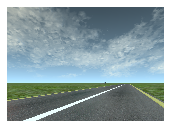

1. Car distance from middel lane marking
2.8437816435059577


2. Car distance from left lane marking
6.39382382659156


3. Car distance from right lane marking
0.7062562264759283


4. Distance between ego vehicle and right lane when ego vehicle on marking
5. Distance between ego vehicle and left lane when ego vehicle on marking








6. Distance between ego vehicle and preceeding vehicle in current lane :
7. Distance between ego vehicle and preceeding vehicle in left lane
8. Angle between car heading and tangent of the road
17.116141462206574




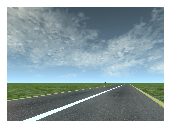

1. Car distance from middel lane marking
2.8437816435059577


2. Car distance from left lane marking
6.39382382659156


3. Car distance from right lane marking
0.7062562264759283


4. Distance between ego vehicle and right lane when ego vehicle on marking
5. Distance between ego vehicle and left lane when ego vehicle on marking








6. Distance between ego vehicle and preceeding vehicle in current lane :
7. Distance between ego vehicle and preceeding vehicle in left lane
8. Angle between car heading and tangent of the road
17.116283826723585




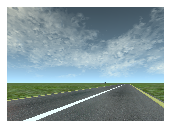

1. Car distance from middel lane marking
2.8437816435059577


2. Car distance from left lane marking
6.39382382659156


3. Car distance from right lane marking
0.7062562264759283


4. Distance between ego vehicle and right lane when ego vehicle on marking
5. Distance between ego vehicle and left lane when ego vehicle on marking








6. Distance between ego vehicle and preceeding vehicle in current lane :
7. Distance between ego vehicle and preceeding vehicle in left lane
8. Angle between car heading and tangent of the road
17.11632626869855




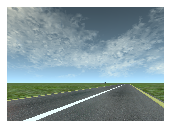

1. Car distance from middel lane marking
2.8437816435059577


2. Car distance from left lane marking
6.39382382659156


3. Car distance from right lane marking
0.7062562264759283


4. Distance between ego vehicle and right lane when ego vehicle on marking
5. Distance between ego vehicle and left lane when ego vehicle on marking








6. Distance between ego vehicle and preceeding vehicle in current lane :
7. Distance between ego vehicle and preceeding vehicle in left lane
8. Angle between car heading and tangent of the road
17.116208537727093




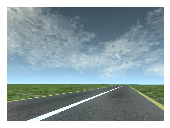

1. Car distance from middel lane marking
2.8001073631305684


2. Car distance from left lane marking
6.35015097775247


3. Car distance from right lane marking
0.7499314709425672


4. Distance between ego vehicle and right lane when ego vehicle on marking
5. Distance between ego vehicle and left lane when ego vehicle on marking








6. Distance between ego vehicle and preceeding vehicle in current lane :
7. Distance between ego vehicle and preceeding vehicle in left lane
8. Angle between car heading and tangent of the road
16.06742434441745




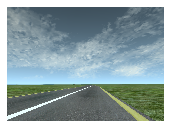

1. Car distance from middel lane marking
2.6104662241320566


2. Car distance from left lane marking
6.160521438042658


3. Car distance from right lane marking
0.9395804216724907


4. Distance between ego vehicle and right lane when ego vehicle on marking
5. Distance between ego vehicle and left lane when ego vehicle on marking








6. Distance between ego vehicle and preceeding vehicle in current lane :
7. Distance between ego vehicle and preceeding vehicle in left lane
8. Angle between car heading and tangent of the road
3.9564156733774936




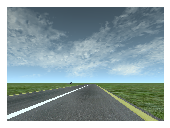

1. Car distance from middel lane marking
2.400586220212844


2. Car distance from left lane marking
5.950659396747664


3. Car distance from right lane marking
1.1494725228172094


4. Distance between ego vehicle and right lane when ego vehicle on marking
5. Distance between ego vehicle and left lane when ego vehicle on marking








6. Distance between ego vehicle and preceeding vehicle in current lane :
7. Distance between ego vehicle and preceeding vehicle in left lane
8. Angle between car heading and tangent of the road
3.3833268114873913




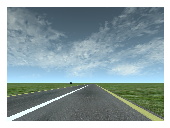

1. Car distance from middel lane marking
2.2282390906822034


2. Car distance from left lane marking
5.778328568349876


3. Car distance from right lane marking
1.3218306306150187


4. Distance between ego vehicle and right lane when ego vehicle on marking
5. Distance between ego vehicle and left lane when ego vehicle on marking








6. Distance between ego vehicle and preceeding vehicle in current lane :
7. Distance between ego vehicle and preceeding vehicle in left lane
8. Angle between car heading and tangent of the road
3.3845146839460667




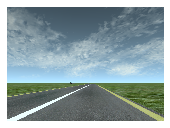

1. Car distance from middel lane marking
2.1066856318885607


2. Car distance from left lane marking
5.656786556927518


3. Car distance from right lane marking
1.4433917988297955


4. Distance between ego vehicle and right lane when ego vehicle on marking
5. Distance between ego vehicle and left lane when ego vehicle on marking








6. Distance between ego vehicle and preceeding vehicle in current lane :
7. Distance between ego vehicle and preceeding vehicle in left lane
8. Angle between car heading and tangent of the road
3.3546675656076754




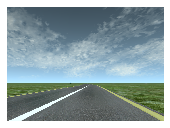

1. Car distance from middel lane marking
2.0152196086362713


2. Car distance from left lane marking
5.565329229476071


3. Car distance from right lane marking
1.534863678412717


4. Distance between ego vehicle and right lane when ego vehicle on marking
5. Distance between ego vehicle and left lane when ego vehicle on marking








6. Distance between ego vehicle and preceeding vehicle in current lane :
7. Distance between ego vehicle and preceeding vehicle in left lane
8. Angle between car heading and tangent of the road
3.311626813349489




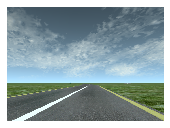

1. Car distance from middel lane marking
1.9467394104890843


2. Car distance from left lane marking
5.496855625289027


3. Car distance from right lane marking
1.6033483173713043


4. Distance between ego vehicle and right lane when ego vehicle on marking
5. Distance between ego vehicle and left lane when ego vehicle on marking
5.496855625289027










6. Distance between ego vehicle and preceeding vehicle in current lane :
7. Distance between ego vehicle and preceeding vehicle in left lane
8. Angle between car heading and tangent of the road
3.302937818434858




ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

In [10]:
# Creating a loop to collect indicator values and person view.
# Loop will run for 100000 times, collecting values and image at every 0.1 second.

for index in range(100000):
    time.sleep(0.1)
    vehicle1.update_vehicle()  # Synchs the vehicle's "state" variable with the simulator
    sensors = bng.poll_sensors(vehicle1)
    vehicle2.update_vehicle()
    sensors = bng.poll_sensors(vehicle2)
    vehicle3.update_vehicle()
    sensors = bng.poll_sensors(vehicle3)
    vehicle4.update_vehicle()
    sensors = bng.poll_sensors(vehicle4)
    vehicle5.update_vehicle()
    sensors = bng.poll_sensors(vehicle5)
    vehicle6.update_vehicle()
    sensors = bng.poll_sensors(vehicle6)
    
    # Collecting first person view.
    plt.figure(figsize=(2.8, 2.1))
    plot_overhead(plt.gca())
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    if os.path.exists('C:/Image_Thesis/Image_Folder164/'+str(index)+'.jpg'):
                      plt.savefig('C:/Image_Thesis/Image_Folder164/'+str(index)+'_{}.jpg'.format(int(time.time())), dpi = (100))
    else:
                      plt.savefig('C:/Image_Thesis/Image_Folder164/'+str(index)+'.jpg', dpi = (100))
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.show()
                      
    # Collecting position and direction for the vehicles in the scenario.
    directions.append(vehicle1.state['dir'])
    direction_car = geometry.Point(vehicle1.state['dir'])
    #display(vehicle1.state['dir'])
    newdirection_road = geometry.Point(vehicle1.state['dir'])
    positions.append(vehicle1.state['pos'])
    #display(vehicle1.state['pos'])
    positions.append(vehicle2.state['pos'])
    #display(vehicle2.state['pos'])
    positions.append(vehicle3.state['pos'])
    positions.append(vehicle4.state['pos'])
    positions.append(vehicle5.state['pos'])
    
    vehiclepos = vehicle1.state['pos']
    vehiclepos2 = vehicle2.state['pos']
    vehiclepos3 = vehicle3.state['pos']
    vehiclepos4 = vehicle4.state['pos']
    vehiclepos5 = vehicle5.state['pos']
    vehiclepos6 = vehicle6.state['pos']
    
    newposition_Vehicle1 = geometry.Point(vehicle1.state['pos'])
    newposition_Vehicle2 = geometry.Point(vehicle2.state['pos'])
    newposition_Vehicle3 = geometry.Point(vehicle3.state['pos'])
    newposition_Vehicle4 = geometry.Point(vehicle4.state['pos'])
    newposition_Vehicle5 = geometry.Point(vehicle5.state['pos'])
    newposition_Vehicle6 = geometry.Point(vehicle6.state['pos'])
    
    
    
    def on_left(dist_left, dist_right):
        if dist_left < dist_right:
            return True
        else:
            return False
     
    # For Main vehicle (Ego Car)
    i = 0
    min_dist = 100000000
    closest_node = -1
    while i < len(node_ar)-1:
        current = node_dist(node_ar[i][0], node_ar[i][1], node_ar[i+1][0], node_ar[i+1][1],vehiclepos[0],vehiclepos[1])
        if min_dist > current:
            min_dist = current
            closest_node = i
        i += 1
   



    print('1. Car distance from middel lane marking')
    if min_dist >= 1 and min_dist <= 4:
        print(min_dist)
        print('\n')
    
    
    a = 0
    min_dist_left = 100000000
    while a < len(node_ar_left)-1:
        min_dist_left = min(min_dist_left, node_dist(node_ar_left[a][0], node_ar_left[a][1], node_ar_left[a+1][0], node_ar_left[a+1][1], vehiclepos[0], vehiclepos[1]))
        a += 1
   


    print('2. Car distance from left lane marking')
    if min_dist_left < 8 and min_dist_left > 0.5: 
        print(min_dist_left)
        print('\n')
    
    b = 0
    min_dist_right = 100000000
    while b < len(node_ar_right)-1:
        min_dist_right = min(min_dist_right, node_dist(node_ar_right[b][0], node_ar_right[b][1], node_ar_right[b+1][0],node_ar_right[b+1][1], vehiclepos[0], vehiclepos[1]))
        b += 1
    
    
    
    print('3. Car distance from right lane marking')
    if min_dist_right > 0.5 and min_dist_right < 8:
        print(min_dist_right)
        print('\n')
    
    
    
    print('4. Distance between ego vehicle and right lane when ego vehicle on marking')
    ego_min_dis_right = 0
    if min_dist_right < 5.5 and min_dist_right > 3.5:
        ego_min_dis_right = min_dist_right
        print(ego_min_dis_right)
        print('\n')
    
    
    
    print('5. Distance between ego vehicle and left lane when ego vehicle on marking')
    ego_min_dis_left = 0
    if min_dist_left < 5.5 and min_dist_left  > 3.5 :
        ego_min_dis_left = min_dist_left
        print(ego_min_dis_left)
        print('\n')
    
    
    
    
    # For Vehicle2
    
    c = 0
    min_dist_left_v2 = 100000000
    while c < len(node_ar_left)-1:
        min_dist_left_v2 = min(min_dist_left_v2, node_dist(node_ar_left[c][0], node_ar_left[c][1], node_ar_left[c+1][0], node_ar_left[c+1][1], vehiclepos2[0], vehiclepos2[1]))
        c += 1
    #print(min_dist_left_v2)
    print('\n')
    
    d = 0
    min_dist_right_v2 = 100000000
    while d < len(node_ar_right)-1:
        min_dist_right_v2 = min(min_dist_right_v2, node_dist(node_ar_right[d][0], node_ar_right[d][1], node_ar_right[d+1][0],node_ar_right[d+1][1], vehiclepos2[0], vehiclepos2[1]))
        d += 1
    #print(min_dist_right_v2)
    print('\n')
    
    side = on_left(min_dist_left_v2, min_dist_right_v2)
    
    
        
    
    
    # For Vehicle 3
    
    e = 0
    min_dist_left_v3 = 100000000
    while e < len(node_ar_left)-1:
        min_dist_left_v3 = min(min_dist_left_v3, node_dist(node_ar_left[e][0], node_ar_left[e][1], node_ar_left[e+1][0], node_ar_left[e+1][1], vehiclepos3[0], vehiclepos3[1]))
        e += 1
    #print(min_dist_left_v3)
    print('\n')
    
    f = 0
    min_dist_right_v3 = 100000000
    while f < len(node_ar_right)-1:
        min_dist_right_v3 = min(min_dist_right_v3, node_dist(node_ar_right[f][0], node_ar_right[f][1], node_ar_right[f+1][0],node_ar_right[f+1][1], vehiclepos3[0], vehiclepos3[1]))
        f += 1
    #print(min_dist_right_v3)
    print('\n')
    
    # For Vehicle 4
    
    g = 0
    min_dist_left_v4 = 100000000
    while g < len(node_ar_left)-1:
        min_dist_left_v4 = min(min_dist_left_v4, node_dist(node_ar_left[g][0], node_ar_left[g][1], node_ar_left[g+1][0], node_ar_left[g+1][1], vehiclepos4[0], vehiclepos4[1]))
        g += 1
    #print(min_dist_left_v4)
    #print('\n')
    
    h = 0
    min_dist_right_v4 = 100000000
    while h < len(node_ar_right)-1:
        min_dist_right_v4 = min(min_dist_right_v4, node_dist(node_ar_right[h][0], node_ar_right[h][1], node_ar_right[h+1][0],node_ar_right[h+1][1], vehiclepos4[0], vehiclepos4[1]))
        h += 1
    #print(min_dist_right_v4)
    #print('\n')
    
    # For Vehicle 5
    
    s = 0
    min_dist_left_v5 = 100000000
    while s < len(node_ar_left)-1:
        min_dist_left_v5 = min(min_dist_left_v5, node_dist(node_ar_left[s][0], node_ar_left[s][1], node_ar_left[s+1][0], node_ar_left[s+1][1], vehiclepos5[0], vehiclepos5[1]))
        s += 1
    #print(min_dist_left_v5)
    #print('\n')
    
    t = 0
    min_dist_right_v5 = 100000000
    while t < len(node_ar_right)-1:
        min_dist_right_v5 = min(min_dist_right_v5, node_dist(node_ar_right[t][0], node_ar_right[t][1], node_ar_right[t+1][0],node_ar_right[t+1][1], vehiclepos5[0], vehiclepos5[1]))
        t += 1
    #print(min_dist_right_v5)
    #print('\n')
    
    
    # For Vwhicle 6
    
    u = 0
    min_dist_left_v6 = 100000000
    while u < len(node_ar_left)-1:
        min_dist_left_v6 = min(min_dist_left_v6, node_dist(node_ar_left[u][0], node_ar_left[u][1], node_ar_left[u+1][0], node_ar_left[u+1][1], vehiclepos6[0], vehiclepos6[1]))
        u += 1
    #print(min_dist_left_v5)
    #print('\n')
    
    v = 0
    min_dist_right_v6 = 100000000
    while v < len(node_ar_right)-1:
        min_dist_right_v6 = min(min_dist_right_v6, node_dist(node_ar_right[v][0], node_ar_right[v][1], node_ar_right[v+1][0],node_ar_right[v+1][1], vehiclepos6[0], vehiclepos6[1]))
        v += 1
    
    
    print('6. Distance between ego vehicle and preceeding vehicle in current lane :')
    
    
    previous_distance1 = vehicle_distance1
    previous_distance2 = vehicle_distance2
    previous_distance3 = vehicle_distance3
    previous_distance4 = vehicle_distance4
    previous_distance5 = vehicle_distance5
    
    previous_distance_all = [previous_distance1, previous_distance2, previous_distance3, previous_distance4,previous_distance5]
    
    vehicle_distance1 = newposition_Vehicle2.distance(newposition_Vehicle1)
    vehicle_distance2 = newposition_Vehicle3.distance(newposition_Vehicle1)
    vehicle_distance3 = newposition_Vehicle4.distance(newposition_Vehicle1)
    vehicle_distance4 = newposition_Vehicle5.distance(newposition_Vehicle1)
    vehicle_distance5 = newposition_Vehicle6.distance(newposition_Vehicle1)
    
    vehicle_distance_all = [vehicle_distance1, vehicle_distance2, vehicle_distance3, vehicle_distance4, vehicle_distance5]
    
    other_veh_dist = [min_dist_right_v2, min_dist_right_v3, min_dist_right_v4, min_dist_right_v5, min_dist_right_v6]
    
    vehicle_dis_in_current = 0
    i = 0
    while i < len(vehicle_distance_all):
        distance_of_vehicle = vehicle_distance_all[i]
        prev_dist = previous_distance_all[i]
        otherdis = other_veh_dist[i]
        i += 1
        if prev_dist != -1 and distance_of_vehicle < prev_dist:
            if distance_of_vehicle <= 100 and otherdis > 0.5 and otherdis < 4:
                vehicle_dis_in_current = distance_of_vehicle
                print(vehicle_dis_in_current) 
                
    

    #previous_distance1 = vehicle_distance1
    #vehicle_distance1 = newposition_Vehicle2.distance(newposition_Vehicle1)
    #if previous_distance1 != -1 and vehicle_distance1 < previous_distance1:
        #if vehicle_distance1 <= 100:
            #print(vehicle_distance1)
    
    #previous_distance2 = vehicle_distance2
    #vehicle_distance2 = newposition_Vehicle3.distance(newposition_Vehicle1)
    #if previous_distance2 != -1 and vehicle_distance2 < previous_distance2:
        #if vehicle_distance2 <= 100:
            #print(vehicle_distance2)
            #print('\n')
            
    
    #previous_distance3 = vehicle_distance3
    #vehicle_distance3 = newposition_Vehicle4.distance(newposition_Vehicle1)
    #if previous_distance3 != -1 and vehicle_distance3 < previous_distance3:
        #if vehicle_distance3 <= 100:
            #print(vehicle_distance3)
            #print('\n')
    
    #previous_distance4 = vehicle_distance4
   # vehicle_distance4 = newposition_Vehicle5.distance(newposition_Vehicle1)
    #if previous_distance4 != -1 and vehicle_distance4 < previous_distance4:
        #if vehicle_distance4 <= 100:
           # print(vehicle_distance4)
            #print('\n')
    
    
    #previous_distance5 = vehicle_distance5
    #vehicle_distance5 = newposition_Vehicle6.distance(newposition_Vehicle1)
    #if previous_distance5 != -1 and vehicle_distance5 < previous_distance5:
       # if vehicle_distance5 <= 100:
            #print(vehicle_distance5)
            #print('\n')
    
    print('7. Distance between ego vehicle and preceeding vehicle in left lane')
    
    
    vehicle_dis_in_left = 0
    i = 0
    while i < len(vehicle_distance_all):
        distance_of_vehicle = vehicle_distance_all[i]
        prev_dist = previous_distance_all[i]
        otherdis = other_veh_dist[i]
        i += 1
        if prev_dist != -1 and distance_of_vehicle < prev_dist:
            if distance_of_vehicle <= 100 and otherdis > 4 and otherdis < 8:
                vehicle_dis_in_left = distance_of_vehicle
                print(vehicle_dis_in_left)
    
    
    
    print('8. Distance between ego vehicle and preceeding vehicle in right lane')
    
    
    
    vehicle_dis_in_right = 0
    i = 0
    while i < len(vehicle_distance_all):
        distance_of_vehicle = vehicle_distance_all[i]
        prev_dist = previous_distance_all[i]
        otherdis = other_veh_dist[i]
        i += 1
        if prev_dist != -1 and distance_of_vehicle < prev_dist:
            if distance_of_vehicle <= 100 and otherdis > 0.5 and otherdis < 4:
                vehicle_dis_in_right = distance_of_vehicle
                print(vehicle_dis_in_right) 
                
    
    
    
    
    #vehicle_distance1 = newposition_Vehicle2.distance(newposition_Vehicle1)
    #if vehicle_distance1 <= 100 and min_dist_left_v2 > 3 and min_dist_right_v2 < 8:
        #print(vehicle_distance1)
    #vehicle_distance2 = newposition_Vehicle3.distance(newposition_Vehicle1)
    #if vehicle_distance2 <= 100:
        #print(vehicle_distance2)
    #vehicle_distance3 = newposition_Vehicle4.distance(newposition_Vehicle1)
    #if vehicle_distance3 <= 100:
        #print(vehicle_distance3)
    #vehicle_distance4 = newposition_Vehicle5.distance(newposition_Vehicle1)
    #if vehicle_distance4 <= 100:
        #print(vehicle_distance4)
    #vehicle_distance5 = newposition_Vehicle6.distance(newposition_Vehicle1)
    #if vehicle_distance5 <= 100:
        #print(vehicle_distance5)
    
    print('9. Angle between car heading and tangent of the road')
    angle = compute_angle_road(newposition_Vehicle1, direction_car, closest_node, node_ar)
    print(angle)
    print('\n')
    
    
    print('10. Fast')
    fast = None
    
    
    
    
    
    # Writing data on the CSV file
    file_exists = os.path.isfile('C:/Dataset_Thesis/Test164.csv')
    with open('C:/Dataset_Thesis/Test164.csv', 'a') as f:
        headers = ['Image', 'MiddleDist', 'LeftDist', 'RightDist', 'OnMarkDistLeft', 'OnMarkDistRight', 'CurrentlaneCar', 'LeftlaneCar',' RightlaneCar', 'Angle','Fast']
        writer = csv.DictWriter(f,delimiter=',', lineterminator='\n',fieldnames=headers)
        if not file_exists:
            writer.writeheader() 
        writer.writerow({'Image': 'C:/Image_Thesis/Image_Folder164/'+str(index)+'.jpg', 'MiddleDist': min_dist , 'LeftDist': min_dist_left, 'RightDist': min_dist_right, 'OnMarkDistLeft': ego_min_dis_left, 'OnMarkDistRight': ego_min_dis_right, 'CurrentlaneCar': vehicle_dis_in_current, 'LeftlaneCar': vehicle_dis_in_left ,'RightlaneCar': vehicle_dis_in_right, 'Angle': angle,'Fast': fast})
    
    


In [ ]:
min_dist, min_dist_left, min_dist_right, ego_min_dis_left, ego_min_dis_right, vehicle_dis_in_current, vehicle_dis_in_left, angle